##Entendendo as bases

Vamos começar importando as bibliotecas necessárias para nossa análise e tratamento dos dados. Usamos pandas para manipulação de dados, numpy para operações numéricas, seaborn e matplotlib.pyplot para visualização de dados com gráficos e datetime para lidar com datas

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Importaremos as bases de dados que iremos analisar. Estaremos utilizando os seguintes arquivos CSV: Store e Train. Além disso, veremos as primeiras linhas para entender melhor suas estruturas e informações, além de verificar a quantidade de linhas e colunas para ter uma ideia de quantos registros estaremos lidando.

In [ ]:
# Importando e verificando a base
store = pd.read_csv('Store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Verificando tamanho
store.shape

(1115, 10)

In [ ]:
# Importando e verificando a base
train = pd.read_csv('Train.csv')
train.head()

<ipython-input-123-8f587de90daf>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Verificando tamanho
train.shape

(1017209, 9)

##Tratamento de cada base


Após importarmos as bases de dados, e as bibliotecas necessárias, chegamos na etapa de tratamento de cada uma delas. Aqui, buscaremos obter os dados de forma limpa e preparados para a análise exploratória, buscanso alcançar bons insights.

###Store

**Dicionário**

**Store**: um ID exclusivo para cada loja

**StoreType**: diferencia entre 4 modelos de loja diferentes: a, b, c, d

**Assortment**: descreve um nível de sortimento: a = básico, b = extra, c = estendido

**CompetitionDistance**: distância em metros até a loja concorrente mais próxima

**CompetitionOpenSince[Month/Year]**: fornece o ano e o mês aproximados da abertura do concorrente mais próximo

**Promo2**: Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando


**Promo2Since[Year/Week]**: descreve o ano e a semana do calendário em que a loja começou a participar do Promo2

**PromoInterval**: descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "fev, mai, ago, nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja



In [ ]:
# Verificando
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Informações
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Verificando um resumo que nos ajuda a perceber a distribuição
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store.shape

(1115, 10)

In [ ]:
# Verificando dados duplicados
store[store.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


Não existem colunas duplicadas

In [ ]:
# nova coluna 'CompetitionOpenSinceDate', mantendo os nulos
store['CompetitionOpenSinceDate'] = np.where(
    store['CompetitionOpenSinceMonth'].isnull() | store['CompetitionOpenSinceYear'].isnull(),
    np.nan,
    store['CompetitionOpenSinceMonth'].fillna(0).astype(int).astype(str).str.zfill(2) + '/' + store['CompetitionOpenSinceYear'].fillna(0).astype(int).astype(str)
)

# substituindo as strings '00/0' (resultantes de NaN) por NaN na nova coluna
store['CompetitionOpenSinceDate'] = store['CompetitionOpenSinceDate'].replace('00/0', np.nan)

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceDate
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,09/2008
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11/2007
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12/2006
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,09/2009
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,04/2015


In [ ]:
# Verificando dados nulos
store.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


- 544 lojas não participam da Promo2: deixar nulo

**Direcionamentos dados:**
-  Se existe a CompetitionDistance e não existe CompetitionMonth e/ou CompetitionYear = substituir pela moda
- Se Promo2 == 0, deixar Promo2SinceYear e Promointerval como nulo (visto que essas duas colunas estão diretamente relacionadas à Promo2)

In [ ]:
# Substituir os valores ausentes em CompetitionOpenSinceMonth e CompetitionOpenSinceYear pela moda
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    moda = store[col].mode()[0]
    store.loc[store['CompetitionDistance'].notna() & store[col].isna(), col] = moda

# Verificando se deu certo
valores_ausentes = store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].isna().sum()
print("valores ausentes:")
print(valores_ausentes)

valores ausentes:
CompetitionDistance          3
CompetitionOpenSinceMonth    3
CompetitionOpenSinceYear     3
dtype: int64


- dúvida: nao deveria substituir pela moda só no caso de existir CompetitionDistance e não existir CompetitionMonth/Year? acho que desse jeito substituiu todos os valores, independente da existencia ou nao

In [ ]:
# Ajustar os valores de Promo2SinceYear e PromoInterval para nulo quando Promo2 == 0
store.loc[store['Promo2'] == 0, ['Promo2SinceYear', 'PromoInterval']] = None

print("Valores nulos quando Promo2 é 0:")
print(store.loc[store['Promo2'] == 0, ['Promo2SinceYear', 'PromoInterval']].isna().sum())

Valores nulos quando Promo2 é 0:
Promo2SinceYear    544
PromoInterval      544
dtype: int64


In [ ]:
# criando uma nova coluna "Promo2SinceMonth" p analisar melhor (em vez de pela semana)
# 4.33 é o número médio de semanas no mês e np.ceil arredonda p cima
store['Promo2SinceMonth'] = np.ceil(store['Promo2SinceWeek'] / 4.33).astype('Int64')  # Int64 p permitir valores nulos
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceDate,Promo2SinceMonth
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,09/2008,<NA>
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11/2007,4
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12/2006,4
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,None,09/2009,<NA>
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None,04/2015,<NA>


In [ ]:
# nova coluna 'Promo2SinceDate', mantendo os nulos - data em que a loja começou a participar da Promo2
store['Promo2SinceDate'] = np.where(
    store['Promo2SinceMonth'].isnull() | store['Promo2SinceYear'].isnull(),
    np.nan,
    store['Promo2SinceMonth'].fillna(0).astype(int).astype(str).str.zfill(2) + '/' + store['Promo2SinceYear'].fillna(0).astype(int).astype(str)
)

# substituindo as strings '00/0' (resultantes de NaN) por NaN na nova coluna
store['Promo2SinceDate'] = store['Promo2SinceDate'].replace('00/0', np.nan)

store.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceDate,Promo2SinceMonth,Promo2SinceDate
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None,09/2008,<NA>,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11/2007,4,04/2010
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12/2006,4,04/2011
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,None,09/2009,<NA>,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None,04/2015,<NA>,NaN


In [ ]:
# confirmando os valores binários em Promo2
store['Promo2'].unique()

array([0, 1])

In [ ]:
# substituindo os códigos de Assortment
assortment_mapping = {
    'a': 'Básico',
    'b': 'Extra',
    'c': 'Estendido'
}

store['Assortment'] = store['Assortment'].replace(assortment_mapping)
store.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceDate,Promo2SinceMonth,Promo2SinceDate
0,1,c,Básico,1270.0,9.0,2008.0,0,NaN,NaN,None,09/2008,<NA>,NaN
1,2,a,Básico,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11/2007,4,04/2010
2,3,a,Básico,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12/2006,4,04/2011
3,4,c,Estendido,620.0,9.0,2009.0,0,NaN,NaN,None,09/2009,<NA>,NaN
4,5,a,Básico,29910.0,4.0,2015.0,0,NaN,NaN,None,04/2015,<NA>,NaN


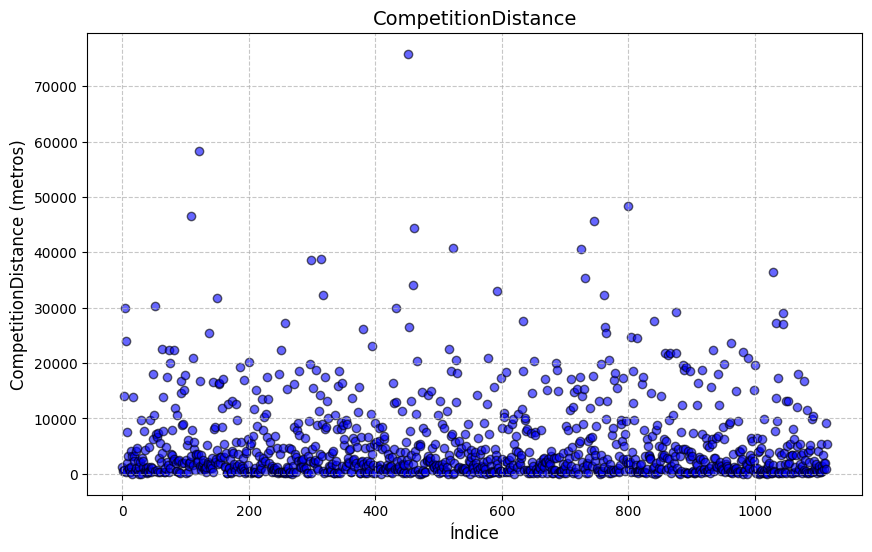

In [ ]:
# gráfico de dispersão para CompetitionDistance p/ identificar possíveis outliers
plt.figure(figsize=(10, 6))
plt.scatter(store.index, store['CompetitionDistance'], alpha=0.6, color='blue', edgecolor='black')
plt.title('CompetitionDistance', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('CompetitionDistance (metros)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

- Concorrentes estão bem próximos, dentro de um raio de 5 a 10 km
- de 20 a 60km, os concorrentes são de poucos a raros, podendo representar também alguns outliers (como no raio dos 70000 metros)

**Posteriormente, investigar o desempenho de vendas principalmente dos concorrentes mais próximos, além de suas estratégias (promo)**

###Train

**Dicionário**

**Store**: um ID exclusivo para cada loja

**DayOfWeek**

**Date**

**Sales**:  o volume de negócios de um determinado dia

**Customers**: o número de clientes em um determinado dia

**Open**: um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta

**Promo**: indica se uma loja está realizando uma promoção naquele dia

**StateHoliday**: indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, fecham em feriados estaduais. Observe que todas as escolas fecham em feriados e fins de semana. a = feriado, b = feriado de Páscoa, c = Natal, 0 = Nenhum

**SchoolHoliday**:  indica se a (Store, Date) foi afetada pelo fechamento de escolas públicas

In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train.shape

(1017209, 9)

In [ ]:
# Verificando dados duplicados
train[train.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
# verificando valores nulos
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# verificando se há dias da semana fora do intervalo [1, 7]
if any(train['DayOfWeek'].isin(range(1,8)) == False):
  print('Há dias da semana fora do intervalo [1, 7]')
else:
  print('Todos os dias da semana estão no intervalo')

Todos os dias da semana estão no intervalo


In [ ]:
# verificando os valores únicos nas colunas que devem retornar 0 ou 1 p/ ver se tá tudo certo
train['Open'].unique()
train['Promo'].unique()
train['SchoolHoliday'].unique()

array([1, 0])

In [ ]:
# substituindo os códigos a, b, c e 0 pelos nomes nomes dos feriados (ou "Nenhum")
holiday_mapping = {
    'a': 'feriado',
    'b': 'feriado de Páscoa',
    'c': 'Natal',
    '0': 'Nenhum'
}

train['StateHoliday'] = train['StateHoliday'].replace(holiday_mapping)

In [ ]:
# criação da variável "isHoliday" p dizer apenas se é feriado ou não
train['isHoliday'] = train['StateHoliday'].apply(lambda x: 0 if x == 'Nenhum' else 1)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,isHoliday
0,1,5,2015-07-31,5263,555,1,1,Nenhum,1,0
1,2,5,2015-07-31,6064,625,1,1,Nenhum,1,0
2,3,5,2015-07-31,8314,821,1,1,Nenhum,1,0
3,4,5,2015-07-31,13995,1498,1,1,Nenhum,1,0
4,5,5,2015-07-31,4822,559,1,1,Nenhum,1,0


In [ ]:
# convertendo a coluna 'Date' para o formato datetime
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')

In [ ]:
# nova coluna 'Month', extraindo o mês
train['Month'] = train['Date'].dt.month
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,isHoliday,Month
0,1,5,2015-07-31,5263,555,1,1,Nenhum,1,0,7
1,2,5,2015-07-31,6064,625,1,1,Nenhum,1,0,7
2,3,5,2015-07-31,8314,821,1,1,Nenhum,1,0,7
3,4,5,2015-07-31,13995,1498,1,1,Nenhum,1,0,7
4,5,5,2015-07-31,4822,559,1,1,Nenhum,1,0,7


In [ ]:
# intervalos de clientes e os labels
bins = [0, 100, 500, float('inf')]  # faixas de 0 a 100, de 101 a 500, e acima de 500
labels = ['Baixa', 'Média', 'Alta']  # etiquetas p cada faixa

# nova coluna 'CustomerFrequency' com base na coluna 'Customers'
train['CustomerFrequency'] = pd.cut(train['Customers'], bins=bins, labels=labels, right=False) # cut divide os valores da coluna Customers nos intervalos que foram definidos
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,isHoliday,Month,CustomerFrequency
0,1,5,2015-07-31,5263,555,1,1,Nenhum,1,0,7,Alta
1,2,5,2015-07-31,6064,625,1,1,Nenhum,1,0,7,Alta
2,3,5,2015-07-31,8314,821,1,1,Nenhum,1,0,7,Alta
3,4,5,2015-07-31,13995,1498,1,1,Nenhum,1,0,7,Alta
4,5,5,2015-07-31,4822,559,1,1,Nenhum,1,0,7,Alta


In [ ]:
# conferindo os valores únicos na nova coluna
print(train['CustomerFrequency'].unique())

# distribuição de clientes nas faixas
print(train['CustomerFrequency'].value_counts())

['Alta', 'Média', 'Baixa']
Categories (3, object): ['Baixa' < 'Média' < 'Alta']
CustomerFrequency
Alta     659238
Média    185031
Baixa    172940
Name: count, dtype: int64


**Gráfico p/ visualizar melhor essa distribuição**

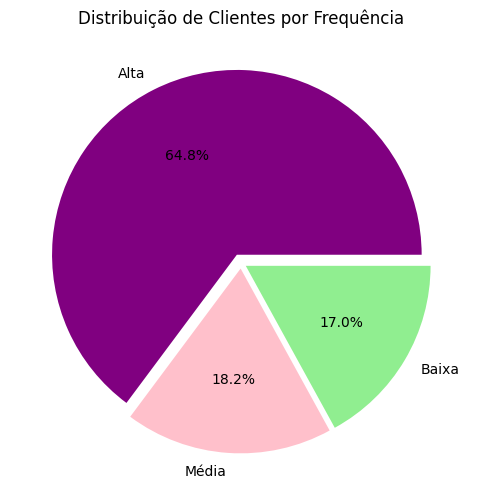

In [ ]:
# gráfico p visualização
frequency_counts = train['CustomerFrequency'].value_counts()

# gráfico de pizza
plt.figure(figsize=(6, 6))
frequency_counts.plot.pie(
    autopct='%1.1f%%',  # porcentagens no gráfico
    labels=frequency_counts.index,  # usando os rótulos das categorias
    colors=['purple', 'pink', 'lightgreen'],
    explode=(0.05, 0.03, 0.03), # borda
)

plt.title('Distribuição de Clientes por Frequência')
plt.ylabel('')  # remove o rótulo padrão do eixo Y
plt.show()

- 64.8% dos clientes apresentam alta frequência, o que é bom

**Analisando outliers para Customers e Sales**

**Sales**

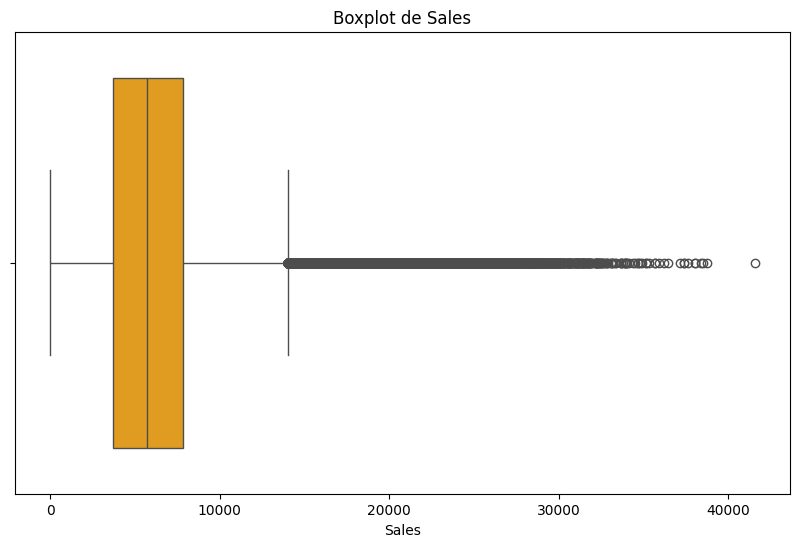

Número de outliers em 'Sales': 26694
     Sales
6    15344
23   14190
24   14180
83   14949
107  14927


In [ ]:
# Boxplot para visualizar os outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Sales'], color='orange')
plt.title('Boxplot de Sales')
plt.xlabel('Sales')
plt.show()

# Calcular limites para detectar outliers
Q1 = train['Sales'].quantile(0.25)
Q3 = train['Sales'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_sales = train[(train['Sales'] < limite_inferior) | (train['Sales'] > limite_superior)]
print(f"Número de outliers em 'Sales': {len(outliers_sales)}")
print(outliers_sales[['Sales']].head())  # alguns exemplos

**Customers**

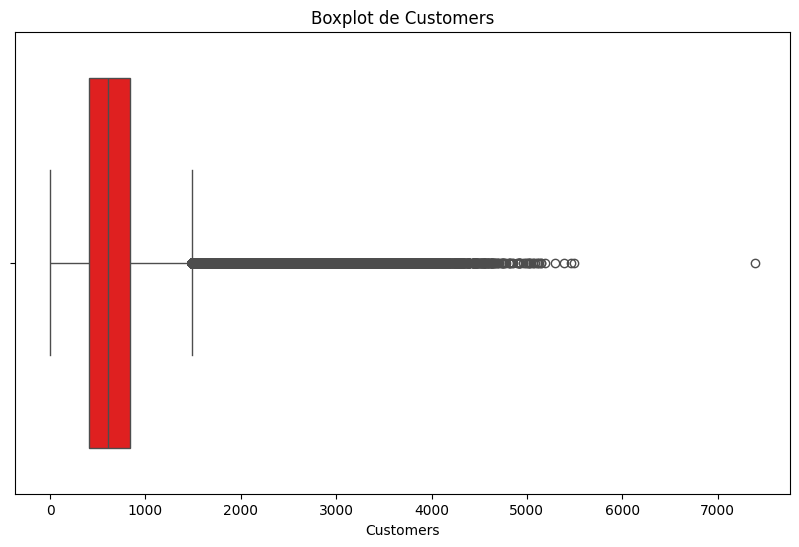

Número de outliers em 'Customers': 38095
     Customers
3         1498
24        1586
124       2041
210       1659
250       2508


In [ ]:
# Boxplot para visualizar os outliers em Customers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Customers'], color='red')
plt.title('Boxplot de Customers')
plt.xlabel('Customers')
plt.show()

# Calcular limites para detectar outliers
Q1_customers = train['Customers'].quantile(0.25)
Q3_customers = train['Customers'].quantile(0.75)
IQR_customers = Q3_customers - Q1_customers

limite_inferior_customers = Q1_customers - 1.5 * IQR_customers
limite_superior_customers = Q3_customers + 1.5 * IQR_customers

# Identificar outliers
outliers_customers = train[(train['Customers'] < limite_inferior_customers) | (train['Customers'] > limite_superior_customers)]
print(f"Número de outliers em 'Customers': {len(outliers_customers)}")
print(outliers_customers[['Customers']].head())  # alguns exemplos

- investigar esses outliers na análise exploratória, vendo em quais momentos se apresentaram dessa forma (promo, feriados, etc)

In [ ]:
#Lojas abertas em feriados
lojas_abertas_feriado = train[(train['isHoliday'] == 1) & (train['Open'] == 1)]

#Lojas fechadas em feriados
lojas_fechadas_feriado = train[(train['isHoliday'] == 1) & (train['Open'] == 0)]

#Resultados
print(f"Número de lojas abertas em feriados: {len(lojas_abertas_feriado)}")

print(f"Número de lojas fechadas em feriados: {len(lojas_fechadas_feriado)}")

Número de lojas abertas em feriados: 113050
Número de lojas fechadas em feriados: 49072


#Análise exploratória dos dados


##Combinação das bases

In [ ]:
# combinando as bases train.csv e store.csv
combined_data = pd.merge(train, store, on="Store", how="left")

combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,isHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceDate,Promo2SinceMonth,Promo2SinceDate
0,1,5,2015-07-31,5263,555,1,1,Nenhum,1,0,...,1270.0,9.0,2008.0,0,NaN,NaN,None,09/2008,<NA>,NaN
1,2,5,2015-07-31,6064,625,1,1,Nenhum,1,0,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11/2007,4,04/2010
2,3,5,2015-07-31,8314,821,1,1,Nenhum,1,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12/2006,4,04/2011
3,4,5,2015-07-31,13995,1498,1,1,Nenhum,1,0,...,620.0,9.0,2009.0,0,NaN,NaN,None,09/2009,<NA>,NaN
4,5,5,2015-07-31,4822,559,1,1,Nenhum,1,0,...,29910.0,4.0,2015.0,0,NaN,NaN,None,04/2015,<NA>,NaN


In [ ]:
combined_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'isHoliday', 'Month',
       'CustomerFrequency', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSinceDate', 'Promo2SinceMonth', 'Promo2SinceDate'],
      dtype='object')

In [ ]:
combined_data.to_csv('combinado.csv', index=False)

# Fazendo o download do arquivo
from google.colab import files
files.download('combinado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Matriz de correlação

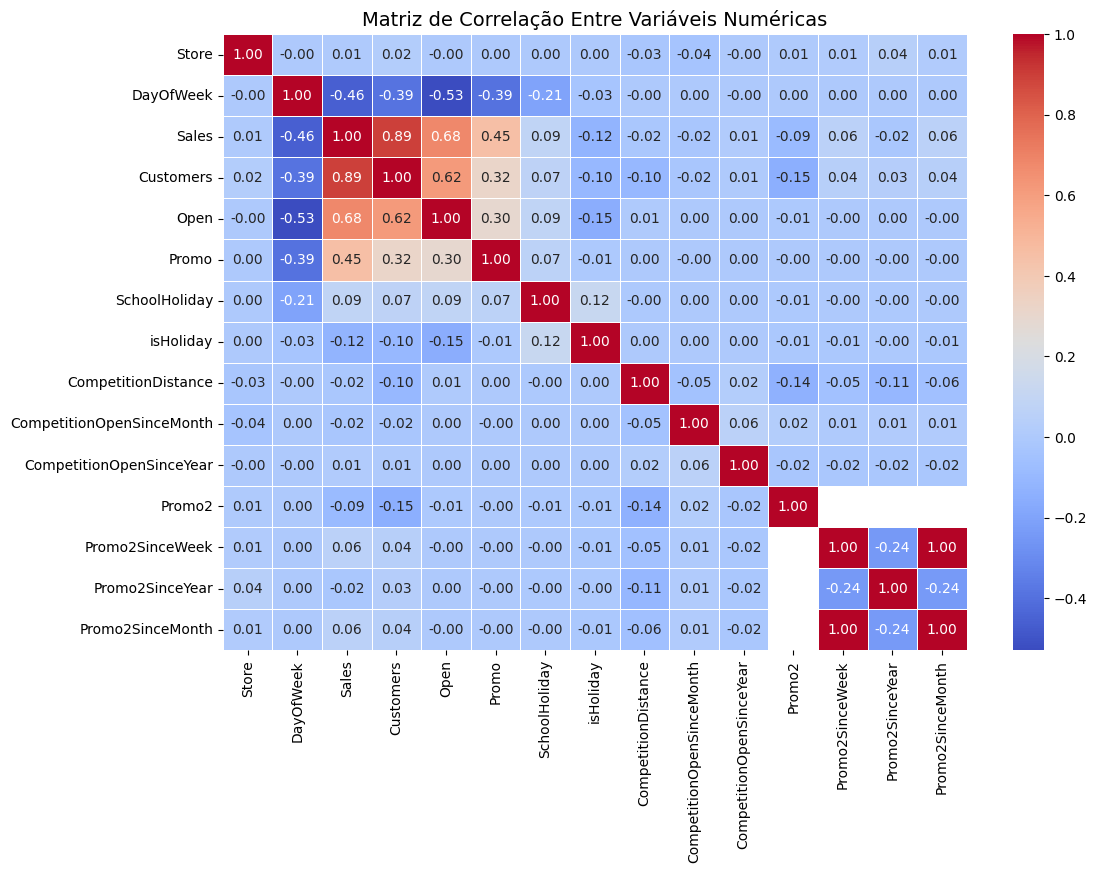

In [ ]:
# Selecionar apenas as variáveis numéricas
numerical_data = combined_data.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numerical_data.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)
plt.title('Matriz de Correlação Entre Variáveis Numéricas', fontsize=14)
plt.show()

Com essa matriz, temos mais noção das colunas que tem uma relação maior e isso nos dará um norte para as análises

##Análise de vendas

###Desempenho de vendas entre os diferentes tipos de loja (StoreType) e níveis de sortimento (Assortment)

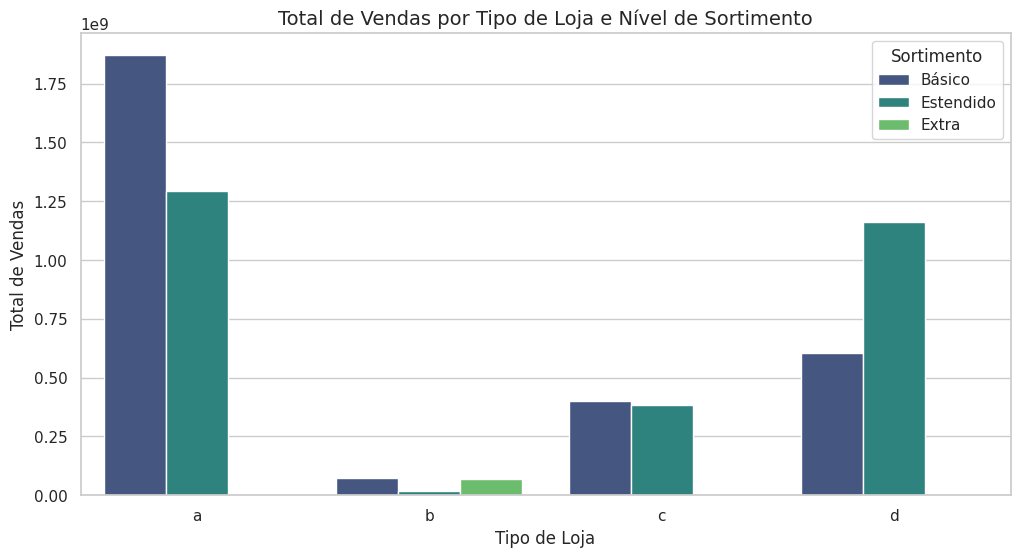

In [229]:
# base na soma total de vendas

# agrupamento por StoreType e Assortment - cpalculo da soma e média de vendas
sum_sales_analysis = combined_data.groupby(['StoreType', 'Assortment']).agg(
    total_sales=('Sales', 'sum')
).reset_index()

# visualização
plt.figure(figsize=(12, 6))
sns.barplot(data=sum_sales_analysis, x='StoreType', y='total_sales', hue='Assortment', palette='viridis')
plt.title('Total de Vendas por Tipo de Loja e Nível de Sortimento', fontsize=14)
plt.xlabel('Tipo de Loja')
plt.ylabel('Total de Vendas')
plt.legend(title='Sortimento')
plt.show()

In [231]:
sum_sales_analysis

,StoreType,Assortment,total_sales
0,a,Básico,1870105131
1,a,Estendido,1295229728
2,b,Básico,71357761
3,b,Estendido,16927322
4,b,Extra,70946312
5,c,Básico,400260421
6,c,Estendido,382961005
7,d,Básico,604026757
8,d,Estendido,1161366186


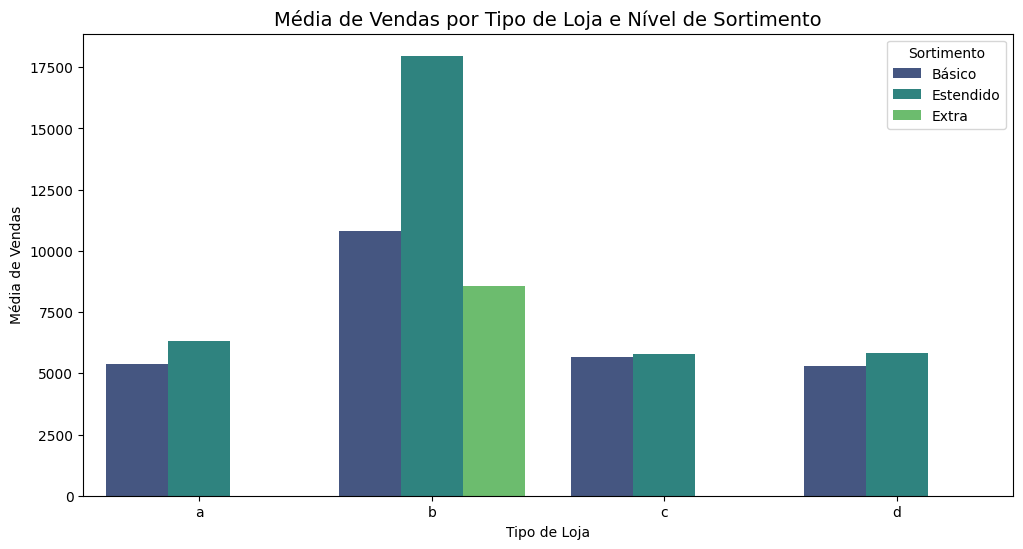

In [ ]:
# base na média de vendas

# agrupamento por StoreType e Assortment - cpalculo da soma e média de vendas
sales_analysis = combined_data.groupby(['StoreType', 'Assortment']).agg(
    mean_sales=('Sales', 'mean')
).reset_index()

# visualização
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_analysis, x='StoreType', y='mean_sales', hue='Assortment', palette='viridis')
plt.title('Média de Vendas por Tipo de Loja e Nível de Sortimento', fontsize=14)
plt.xlabel('Tipo de Loja')
plt.ylabel('Média de Vendas')
plt.legend(title='Sortimento')
plt.show()

In [ ]:
sales_analysis

,StoreType,Assortment,mean_sales
0,a,Básico,5398.858310
1,a,Estendido,6310.867032
2,b,Básico,10821.619806
3,b,Estendido,17969.556263
4,b,Extra,8553.931999
5,c,Básico,5647.174314
6,c,Estendido,5805.782193
7,d,Básico,5317.885943
8,d,Estendido,5826.407660


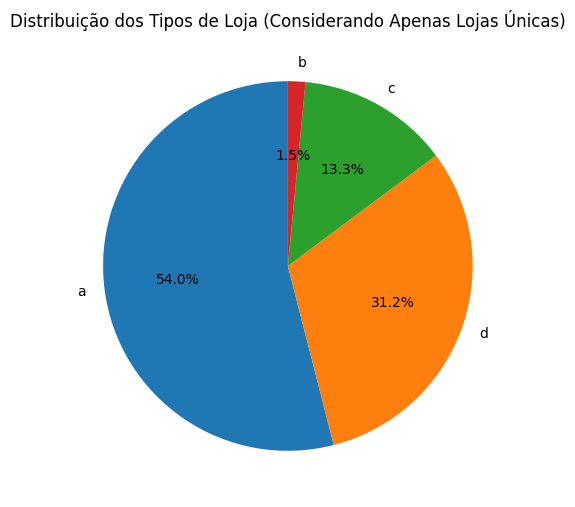

In [ ]:
# Remover duplicatas com base no ID exclusivo da loja (StoreID)
unique_stores = combined_data.drop_duplicates(subset=['Store'])

# Contar os tipos de loja considerando apenas os valores únicos
store_counts_unique = unique_stores['StoreType'].value_counts()

# Gerar gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(store_counts_unique, labels=store_counts_unique.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Tipos de Loja (Considerando Apenas Lojas Únicas)')
plt.show()

In [ ]:
store_counts_unique

,count
StoreType,
a,602
d,348
c,148
b,17


In [ ]:
# analisando a média de vendas de cada tipo de assortment por tipo de loja (valores puros)
sales_analysis = combined_data.groupby(['StoreType', 'Assortment']).agg(
    mean_sales=('Sales', 'mean')
).reset_index()
sales_analysis

,StoreType,Assortment,mean_sales
0,a,Básico,5398.858310
1,a,Estendido,6310.867032
2,b,Básico,10821.619806
3,b,Estendido,17969.556263
4,b,Extra,8553.931999
5,c,Básico,5647.174314
6,c,Estendido,5805.782193
7,d,Básico,5317.885943
8,d,Estendido,5826.407660


In [ ]:
# soma total de vendas por tipo de loja
total_sales_by_store_type = combined_data.groupby('StoreType')['Sales'].sum().reset_index()
total_sales_by_store_type

,StoreType,Sales
0,a,3165334859
1,b,159231395
2,c,783221426
3,d,1765392943


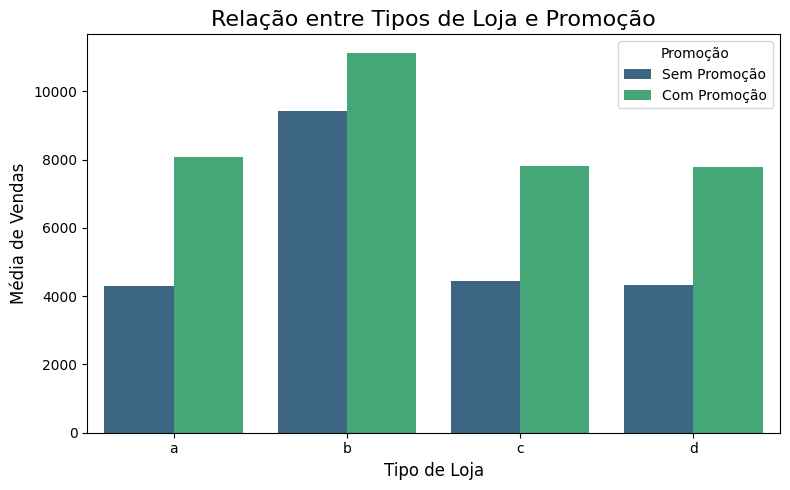

In [ ]:
# relação entre os tipos de loja e promo
store_type_promo = combined_data.groupby(['StoreType', 'Promo'])['Sales'].mean().reset_index()
store_type_promo['Promo'] = store_type_promo['Promo'].replace({0: 'Sem Promoção', 1: 'Com Promoção'})

# Gráfico para visualização
plt.figure(figsize=(8, 5))
sns.barplot(data=store_type_promo, x='StoreType', y='Sales', hue='Promo', palette='viridis')

# Personalização do gráfico
plt.title('Relação entre Tipos de Loja e Promoção', fontsize=16)
plt.xlabel('Tipo de Loja', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.legend(title='Promoção', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
store_type_promo

,StoreType,Promo,Sales
0,a,Sem Promoção,4300.418175
1,a,Com Promoção,8068.080939
2,b,Sem Promoção,9409.434791
3,b,Com Promoção,11109.739497
4,c,Sem Promoção,4435.040156
5,c,Com Promoção,7810.174738
6,d,Sem Promoção,4326.661817
7,d,Com Promoção,7776.593414


**Análises**

- A loja A tem o maior número (disparado) total de vendas. O tipo de sortimento "básico" é o mais vendido, além de possuir maior número de lojas
- Loja b: A loja apresenta o menor número de vendas, por existirem apenas 17. Apesar disso, apresenta um grande valor médio de vendas e tem o tipo de sortimento "extra" completamente concentrado na loja, sendo exclusivo dela, apesar de o tipo básico ainda possuir um pouco mais;
Loja c: Equilíbrio entre o tipo básico e estendido (básico ultrapassa por pouco);
- As lojas c e d tem valores parecidos na média de vendas e são equilibradas quanto aos sortimentos básico e estendido, sendo que as lojas d representam 31.2% (348 lojas), e as lojas c 13.3% (148 lojas)

**Insights**

- Loja A como carro-chefe: A combinação de maior número de lojas e o maior volume de vendas, predominantemente com o sortimento básico, reforça que esse modelo atende às necessidades gerais do mercado. A concentração no básico é um indicador de que o público-alvo valoriza preço ou simplicidade. Estratégias de crescimento devem manter o foco nesse modelo enquanto exploram oportunidades para introduzir gradualmente outros tipos de sortimento para diversificação.

- Loja B como nicho premium: O fato de possuir o menor número de lojas e vendas absolutas, mas ainda assim atingir um alto valor médio de vendas, indica que ela atende a um público segmentado e disposto a pagar mais. Além disso, a exclusividade do sortimento "extra" a diferencia. Essa loja pode ser usada como uma vitrine para experimentar novos produtos ou serviços que demandem maior valor agregado. Expansão seletiva em mercados premium pode ser viável.

###Impacto da data de abertura dos concorrentes em relação a venda

<ipython-input-170-f233a04cf90a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['CompetitionOpenSinceDate'] = pd.to_datetime(combined_data['CompetitionOpenSinceDate'], errors='coerce')
<ipython-input-170-f233a04cf90a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


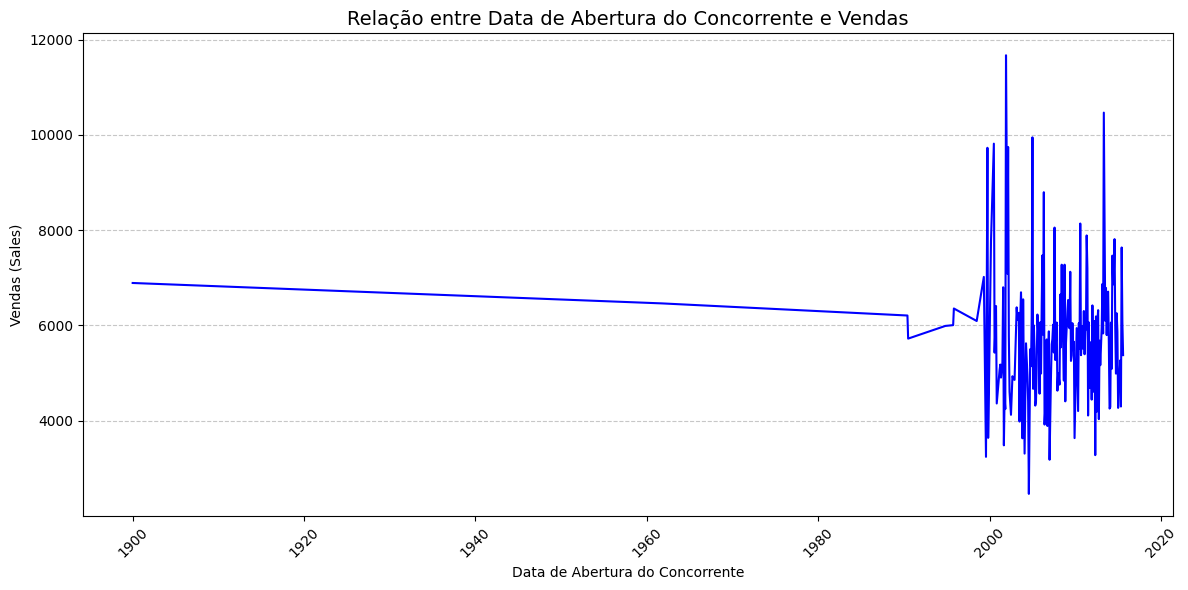

In [ ]:
# Converter a coluna CompetitionOpenSinceDate para datetime, se ainda não estiver
combined_data['CompetitionOpenSinceDate'] = pd.to_datetime(combined_data['CompetitionOpenSinceDate'], errors='coerce')

# Remover valores nulos em CompetitionOpenSinceDate
competition_data = combined_data.dropna(subset=['CompetitionOpenSinceDate'])

# Criar um gráfico relacionando CompetitionOpenSinceDate e Sales
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=competition_data,
    x='CompetitionOpenSinceDate',
    y='Sales',
    ci=None,  # Remover intervalo de confiança para facilitar a visualização
    color='blue'
)

# Adicionar título e rótulos
plt.title('Relação entre Data de Abertura do Concorrente e Vendas', fontsize=14)
plt.xlabel('Data de Abertura do Concorrente')
plt.ylabel('Vendas (Sales)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

Verifica-se um número muito maior de concorrentes aberto no século XXI, e um número menor de vendas quando o concorrente é mais antigo, com uma loja já consolidada no mercado.

###Impacto da distância dos concorrentes (CompetitionDistance) sobre as vendas (Sales)

<ipython-input-171-c8abfcaa2c9b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_sales_customers = combined_data.groupby('DistanceCategory')[['Sales', 'Customers']].mean().reset_index()
<ipython-input-171-c8abfcaa2c9b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(data=distance_sales_customers, x='DistanceCategory', y='Sales', ax=axes[0], palette='viridis')
<ipython-input-171-c8abfcaa2c9b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  customers_plot = sns.barplot(data=distance_sales

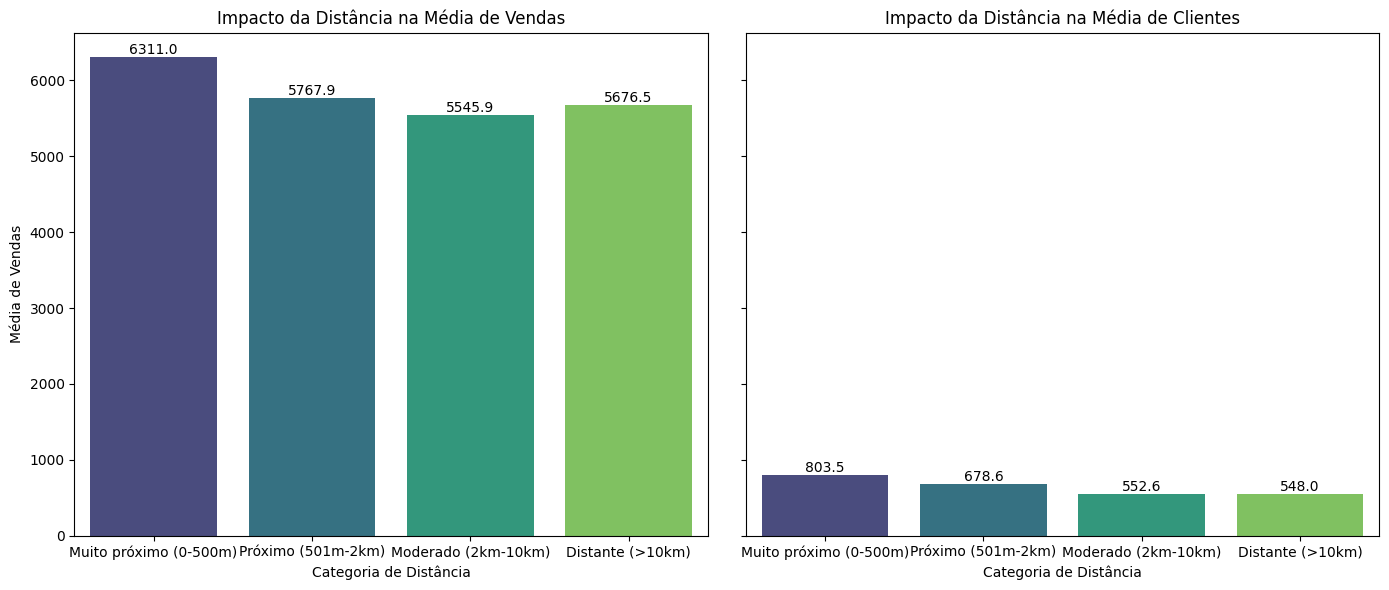

In [ ]:
# Criar categorias de distância
bins = [0, 500, 2000, 10000, combined_data['CompetitionDistance'].max()]
labels = ['Muito próximo (0-500m)', 'Próximo (501m-2km)', 'Moderado (2km-10km)', 'Distante (>10km)']
combined_data['DistanceCategory'] = pd.cut(combined_data['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Calcular médias de vendas e clientes para cada categoria de distância
distance_sales_customers = combined_data.groupby('DistanceCategory')[['Sales', 'Customers']].mean().reset_index()

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico de vendas
sales_plot = sns.barplot(data=distance_sales_customers, x='DistanceCategory', y='Sales', ax=axes[0], palette='viridis')
axes[0].set_title('Impacto da Distância na Média de Vendas')
axes[0].set_ylabel('Média de Vendas')
axes[0].set_xlabel('Categoria de Distância')

# Adicionar valores em cima das barras do gráfico de vendas
for container in sales_plot.containers:
    sales_plot.bar_label(container, fmt='%.1f')

# Gráfico de clientes
customers_plot = sns.barplot(data=distance_sales_customers, x='DistanceCategory', y='Customers', ax=axes[1], palette='viridis')
axes[1].set_title('Impacto da Distância na Média de Clientes')
axes[1].set_ylabel('Média de Clientes')
axes[1].set_xlabel('Categoria de Distância')

# Adicionar valores em cima das barras do gráfico de clientes
for container in customers_plot.containers:
    customers_plot.bar_label(container, fmt='%.1f')

plt.tight_layout()
plt.show()


In [ ]:
distance_sales_customers

,DistanceCategory,Sales,Customers
0,Muito próximo (0-500m),6311.022524,803.451022
1,Próximo (501m-2km),5767.892971,678.598509
2,Moderado (2km-10km),5545.923827,552.586542
3,Distante (>10km),5676.494731,548.043021


**Análises**

- Em todas as categorias de distância, a média de vendas vai de 5676.4 (distante) a 6311.02 (muito próximo), o que talvez não seja algo tão significativo (?)
- Mesma coisa acontece com a média de clientes, que vai 548.04 (distante) a 803.4 (muito próximo)

**Conclusão**

- A distância para concorrentes não parece ser um fator tão determinante no volume médio de vendas e número de clientes. A diferença entre as categorias, apesar de existir, é relativamente pequena. Assim, precisamos analisar outras variáveis, como as **promoções**

<ipython-input-173-c798d3bb7bf4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='DistanceCategory', y='Sales', hue='Promo', ci=None, palette='viridis')


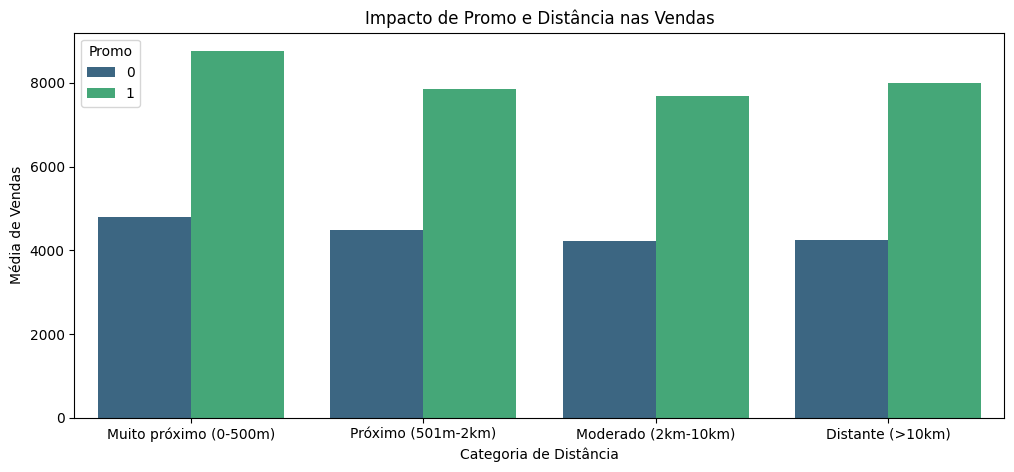

In [ ]:
# Analisando se a presença de promoções neutraliza o impacto da proximidade dos concorrentes
# comparando impacto de Promo e DistanceCategory
plt.figure(figsize=(12, 5))
sns.barplot(data=combined_data, x='DistanceCategory', y='Sales', hue='Promo', ci=None, palette='viridis')
plt.title('Impacto de Promo e Distância nas Vendas')
plt.ylabel('Média de Vendas')
plt.xlabel('Categoria de Distância')
plt.legend(title='Promo')
plt.show()

<ipython-input-174-ba3ae89bd26f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='DistanceCategory', y='Sales', hue='Promo2', ci=None, palette='viridis')


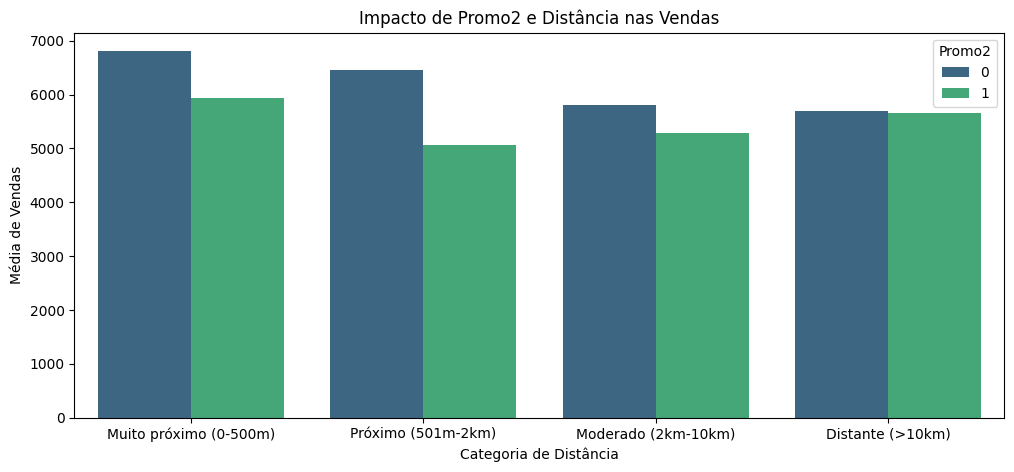

In [ ]:
# comparando impacto de Promo2 e DistanceCategory
plt.figure(figsize=(12, 5))
sns.barplot(data=combined_data, x='DistanceCategory', y='Sales', hue='Promo2', ci=None, palette='viridis')
plt.title('Impacto de Promo2 e Distância nas Vendas')
plt.ylabel('Média de Vendas')
plt.xlabel('Categoria de Distância')
plt.legend(title='Promo2')
plt.show()

**Análises**

-  Promo: as lojas próximas de concorrentes têm desempenho semelhante a lojas mais distantes durante promoções, o que sugere que lojas que estão realizandoo promoções naquele dia ajudam a competir diretamente com lojas rivais
- Promo2: não tem muito impacto na média de vendas levando em conta a distância do concorrente, apesar desse valor quase igualar na categoria "distante"

**Conclusões**

- Promo meio que neutraliza a proximidade de concorrentes, reforçando que promoções pontuais são eficazes em atrair clientes e tirar o impacto direto da concorrência local. Assim, a Promo pode ser um diferencial competitivo significativo, especialmente em áreas com concorrência acirrada
- Promo2 apresenta impacto limitado, indicando que essa promoção contínua pode não estar sendo executada de maneira tão atrativa ou que os clientes não percebem seu valor.



**Insights**

- Foco em promoções pontuais: fortalecer campanhas de promoções específicas (Promo) pode ser uma estratégia eficaz para neutralizar a concorrência direta e aumentar o fluxo de clientes.

###Impacto da data de abertura sobre a distância

<ipython-input-175-0013689ec3aa>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = combined_data.groupby(['DistanceCategory', 'BeforeCompetition'])['Sales'].mean().unstack()


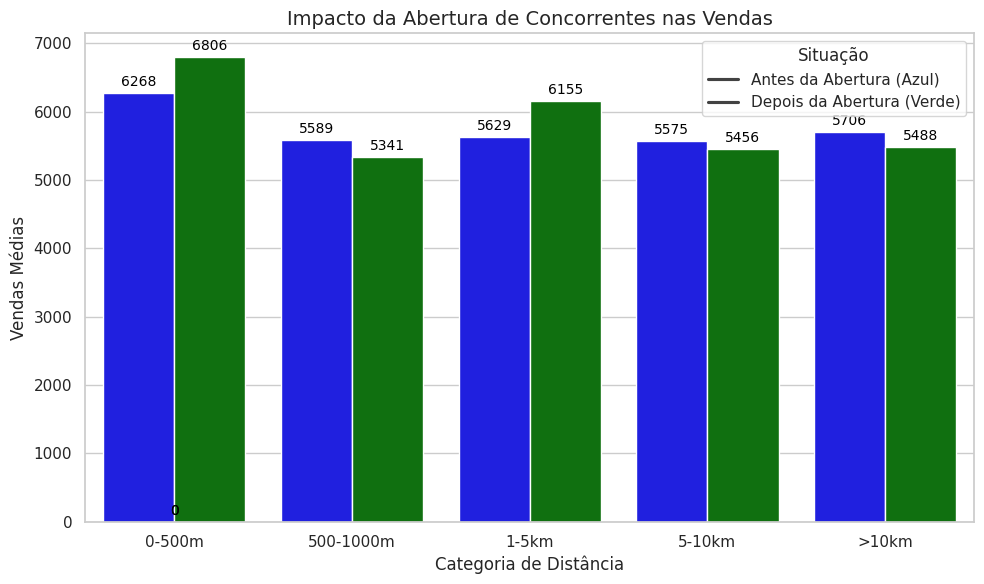

In [ ]:
# Determinar as categorias de distância
bins = [0, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-500m', '500-1000m', '1-5km', '5-10km', '>10km']
combined_data['DistanceCategory'] = pd.cut(
    combined_data['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True
)

# Criar variáveis para antes e depois da abertura
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%Y-%m-%d', errors='coerce')
combined_data['BeforeCompetition'] = combined_data['Date'] < combined_data['CompetitionOpenSinceDate']

# Resumo das vendas por categoria de distância e período
summary = combined_data.groupby(['DistanceCategory', 'BeforeCompetition'])['Sales'].mean().unstack()

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Preparar os dados para o gráfico
summary.reset_index(inplace=True)
summary_melted = summary.melt(id_vars="DistanceCategory", var_name="CompetitionStatus", value_name="AverageSales")

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=summary_melted,
    x="DistanceCategory",
    y="AverageSales",
    hue="CompetitionStatus",
    palette=["blue", "green"]
)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

# Personalizar o gráfico
ax.set_title("Impacto da Abertura de Concorrentes nas Vendas", fontsize=14)
ax.set_xlabel("Categoria de Distância", fontsize=12)
ax.set_ylabel("Vendas Médias", fontsize=12)
plt.legend(
    title="Situação",
    labels=["Antes da Abertura (Azul)", "Depois da Abertura (Verde)"]
)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Percebemos que o fluxo de clientes em concorrentes próximos, acaba potencializando as vendas, ja com distâncias maiores, não traz resultados benéficos.

###Análise da distribuição de vendas por dia (DayOfWeek)

<ipython-input-176-c40a46fd4632>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='sum', data=sales_by_day, palette='viridis')


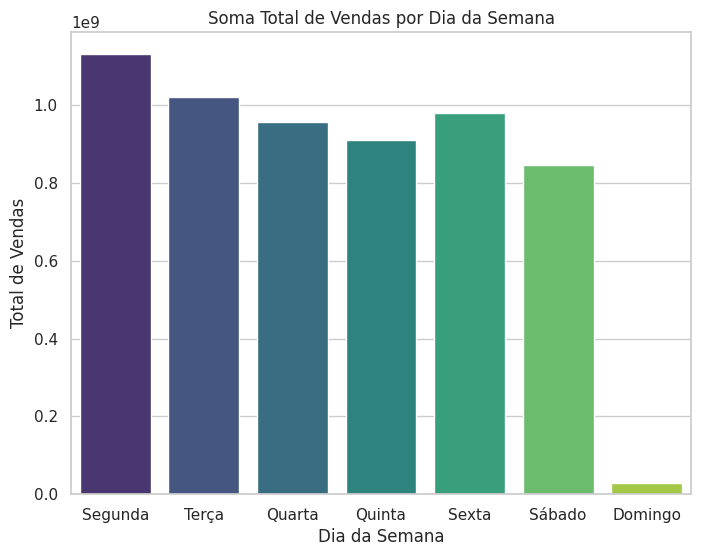

In [ ]:
# agrupando os dados por dia da semana p/ calcular soma e média das vendas
sales_by_day = combined_data.groupby('DayOfWeek')['Sales'].agg(['sum', 'mean']).reset_index()

# renomear os dias da semana para facilitar interpretação
days_labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
sales_by_day['DayOfWeek'] = sales_by_day['DayOfWeek'].map(lambda x: days_labels[x-1])

# soma total de vendas por dia
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='sum', data=sales_by_day, palette='viridis')
plt.title('Soma Total de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Vendas')
plt.show()

<ipython-input-177-9e2cee58cfb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='mean', data=sales_by_day, palette='viridis')


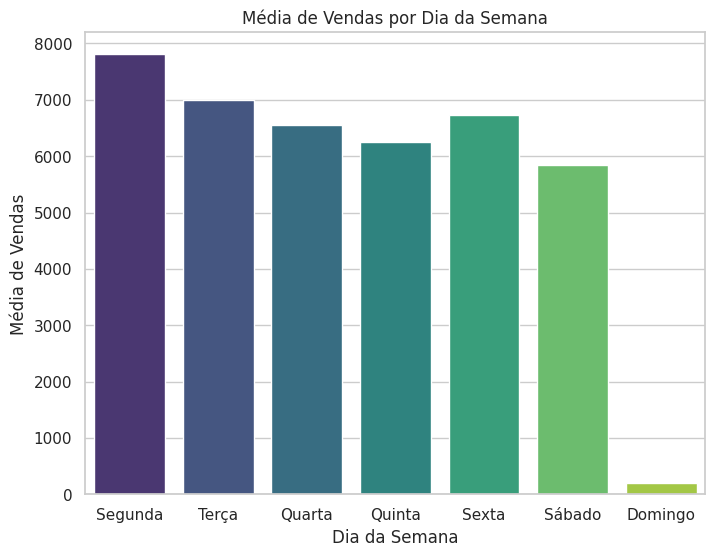

In [ ]:
# média de vendas por dia
plt.figure(figsize=(8, 6))
sns.barplot(x='DayOfWeek', y='mean', data=sales_by_day, palette='viridis')
plt.title('Média de Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Vendas')
plt.show()

In [ ]:
sales_by_day

,DayOfWeek,sum,mean
0,Segunda,1130203012,7809.044510
1,Terça,1020411930,7005.244467
2,Quarta,954962863,6555.884138
3,Quinta,911177709,6247.575913
4,Sexta,980555941,6723.274305
5,Sábado,846317735,5847.562599
6,Domingo,29551433,204.183189


**Análises**

- Segunda e terça são os dias com maior número de vendas, se mantendo constante entre quarta e quinta e apresentando um aumento na sexta;
- Domingo apresenta o menor número, que se dá devido a lojas fechadas no dia. Além disso, sábado também apresenta uma queda.

**Conclusões**

- Segunda e terça como dias de pico: pode indicar estratégias de marketing (como as promoções) - funcionando bem - analisar;
- Aumento na sexta: pode refletir um comportamento de "preparação para o fim de semana", quando os consumidores podem estar mais dispostos a gastar;
- Queda no sábado: pode indicar um fluxo menor de consumidores devido a outras atividades típicas do dia ou à preferência pelas compras antecipadas na sexta.

**Insights**

- Maximizar as vendas nos dias fortes, investindo mais em promoções, campanhas de marketing e esforços de vendas nas segundas, terças e sextas para aproveitar o fluxo elevado de consumidores;
- Impulsionar os dias fracos, considerando campanhas específicas para aumentar o movimento nos sábados e, se possível, promover eventos ou promoções especiais nos domingos para as lojas que abrem.

In [ ]:
# p confirmar
# em quais dias da semana (DayOfWeek) as Promo e Promo2 estão mais presentes
promo_by_day = combined_data.groupby('DayOfWeek')[['Promo', 'Promo2']].mean().reset_index()

# Renomear os dias da semana para facilitar interpretação
promo_by_day['DayOfWeek'] = promo_by_day['DayOfWeek'].map(lambda x: days_labels[x-1])

print(promo_by_day)

  DayOfWeek     Promo    Promo2
0   Segunda  0.537276  0.500643
1     Terça  0.532596  0.500281
2    Quarta  0.532592  0.500278
3    Quinta  0.531935  0.500730
4     Sexta  0.531935  0.500730
5    Sábado  0.000000  0.500643
6   Domingo  0.000000  0.500643


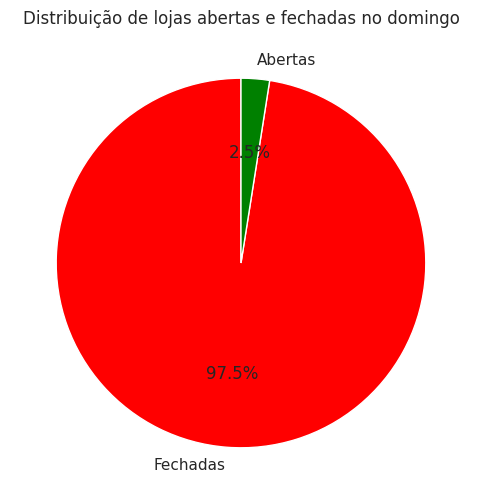

In [ ]:
# filtrar apenas os dados de domingo
sunday_data = combined_data[combined_data['DayOfWeek'] == 7]

# número de lojas abertas e fechadas no domingo
sunday_open_status = sunday_data['Open'].value_counts()

# gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sunday_open_status, labels=['Fechadas', 'Abertas'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribuição de lojas abertas e fechadas no domingo')
plt.show()

##Análise de feriados

###Abertura de lojas nos feriados

In [ ]:
# Filtrar apenas feriados
holiday_data = combined_data[combined_data['StateHoliday'] != 'Nenhum']

# Considerar apenas combinações únicas de loja e feriado
unique_holiday_data = (
    holiday_data[['Store', 'StateHoliday', 'Open']]
    .drop_duplicates()
    .sort_values(['Store', 'StateHoliday', 'Open'], ascending=[True, True, False])
)

# Resolver conflitos priorizando status "Aberta" (Open = 1)
resolved_holiday_data = unique_holiday_data.drop_duplicates(subset=['Store', 'StateHoliday'], keep='first')

# Contar lojas abertas e fechadas por tipo de feriado
holiday_open_status = resolved_holiday_data.groupby(['StateHoliday', 'Open'])['Store'].count().unstack()

# Renomear colunas e substituir NaN por 0 para facilitar interpretação
holiday_open_status = holiday_open_status.rename(columns={0: 'Fechadas', 1: 'Abertas'}).fillna(0).astype(int)

print(holiday_open_status)

Open               Fechadas  Abertas
StateHoliday                        
0                         0     1115
Natal                  1095       20
feriado                 959      156
feriado de Páscoa      1083       32


- Pouquíssimas são as lojas que abrem nos feriados, e feriados estaduais contam com mais lojas abertas

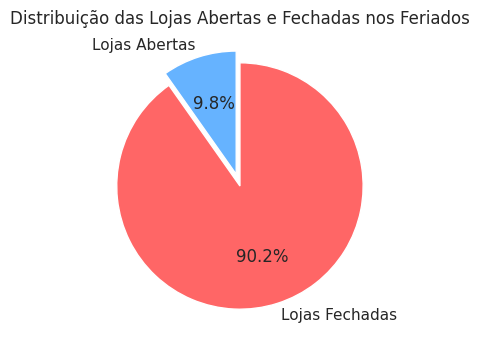

In [ ]:
# Filtrando os dados para feriados
df_holidays = combined_data[combined_data['isHoliday'] == 1]

# Removendo duplicatas, garantindo que cada loja seja contada apenas uma vez
df_holidays_unique = df_holidays.drop_duplicates(subset='Store')

# Contando o número de lojas abertas e fechadas
stores_open = df_holidays_unique[df_holidays_unique['Open'] == 1].shape[0]
stores_closed = df_holidays_unique[df_holidays_unique['Open'] == 0].shape[0]

# Dados para o gráfico de pizza
labels = ['Lojas Abertas', 'Lojas Fechadas']
sizes = [stores_open, stores_closed]
colors = ['#66b3ff', '#ff6666']  # Cores personalizadas para as fatias

# Criando o gráfico de pizza
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))  # explode para destacar a fatia de lojas abertas
plt.title('Distribuição das Lojas Abertas e Fechadas nos Feriados')
plt.show()

In [ ]:
print(stores_open)
print(stores_closed)

109
1006


###Lojas Pré-Feriados

In [ ]:
# Criar uma coluna para identificar o dia anterior
combined_data['PreviousDay'] = combined_data['Date'] - pd.Timedelta(days=1)

# Criar um dataframe apenas com as datas e feriados para otimizar o merge
holiday_dates = combined_data[['Date', 'StateHoliday']].drop_duplicates()

# Fazer o merge para identificar quais dias são pré-feriados
pre_holiday_data = combined_data.merge(
    holiday_dates,
    left_on='PreviousDay',
    right_on='Date',
    suffixes=('', '_Previous'),
    how='inner'
)

# Filtrar apenas os dias pré-feriados
pre_holiday_data = pre_holiday_data[pre_holiday_data['StateHoliday_Previous'] != 'Nenhum']

# Calcular a média de vendas por dia pré-feriado
pre_holiday_sales = pre_holiday_data.groupby('PreviousDay')['Sales'].mean()

# Exibir os resultados
print(pre_holiday_sales)

PreviousDay
2013-01-01    6233.030493
2013-01-06    9710.177578
2013-03-29    8412.916592
2013-04-01    6602.734529
2013-05-01    8864.906726
                 ...     
2015-04-06    7081.753363
2015-05-01    7860.972197
2015-05-14    7709.886996
2015-05-25    6974.361435
2015-06-04    8721.877130
Name: Sales, Length: 168, dtype: float64


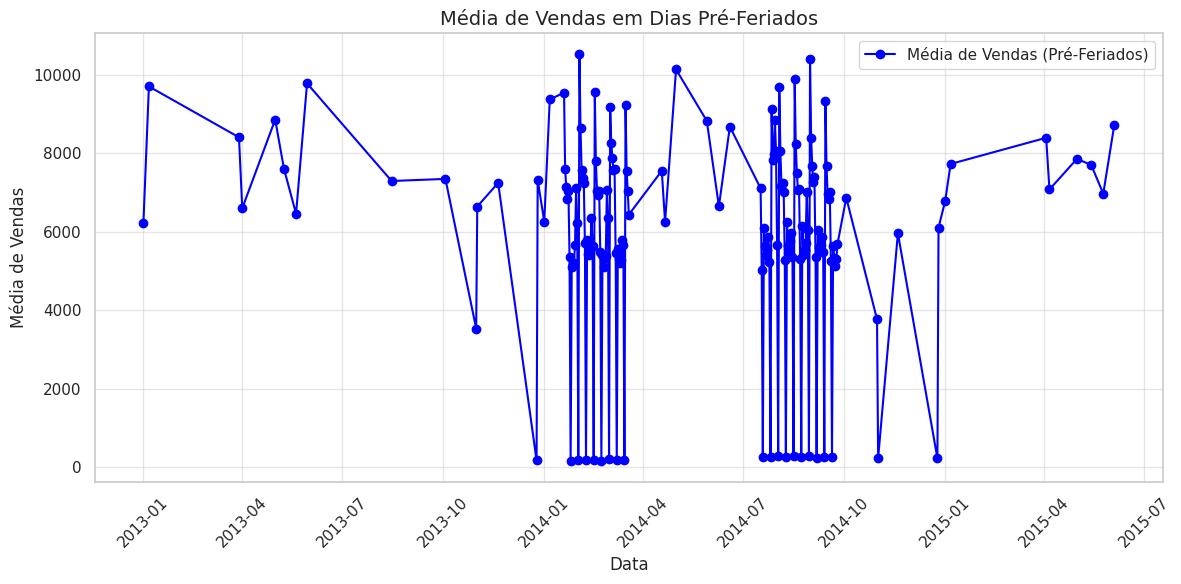

In [ ]:
# Calcular a média de vendas nos dias pré-feriados
pre_holiday_sales = pre_holiday_data.groupby('PreviousDay')['Sales'].mean().reset_index()

# Plotar o gráfico de linha temporal
plt.figure(figsize=(12, 6))
plt.plot(pre_holiday_sales['PreviousDay'], pre_holiday_sales['Sales'],
         marker='o', linestyle='-', color='blue', label='Média de Vendas (Pré-Feriados)')
plt.title('Média de Vendas em Dias Pré-Feriados', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

###Relação entre clientes e feriados

In [ ]:
# Resumo de Clientes em feriados e não feriados
clientes_por_feriado = combined_data.groupby('isHoliday')['Customers'].describe()

# Média de clientes em feriados vs dias normais
media_clientes = combined_data.groupby('isHoliday')['Customers'].mean()

# Exibir os resultados
print("Resumo estatístico de Clientes por isHoliday:")
print(clientes_por_feriado)

print("\nMédia de Clientes por isHoliday:")
print(media_clientes)

Resumo estatístico de Clientes por isHoliday:
              count        mean         std  min    25%    50%    75%     max
isHoliday                                                                    
0          855087.0  653.298069  457.785221  0.0  429.0  622.0  848.0  7388.0
1          162122.0  526.856744  484.222640  0.0    0.0  536.0  773.0  5494.0

Média de Clientes por isHoliday:
isHoliday
0    653.298069
1    526.856744
Name: Customers, dtype: float64


<ipython-input-187-6424c90570fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_clientes.index, y=media_clientes.values, palette="viridis")


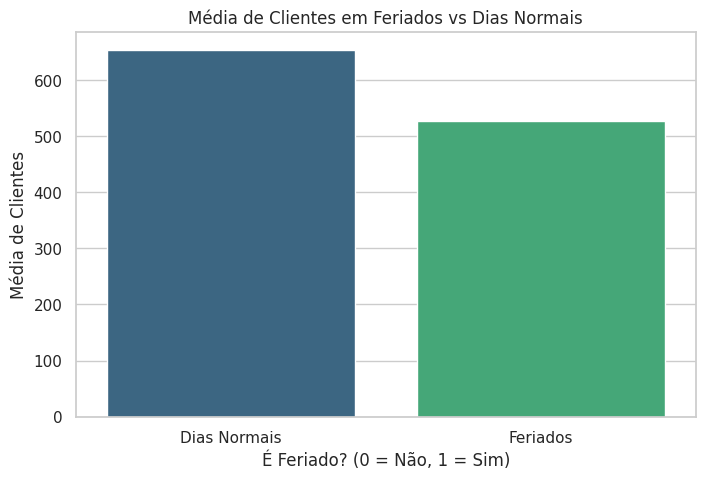

In [ ]:
#gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=media_clientes.index, y=media_clientes.values, palette="viridis")
plt.title('Média de Clientes em Feriados vs Dias Normais')
plt.xlabel('É Feriado? (0 = Não, 1 = Sim)')
plt.ylabel('Média de Clientes')
plt.xticks([0, 1], ['Dias Normais', 'Feriados'])
plt.show()

In [ ]:
media_clientes

,Customers
isHoliday,
0,653.298069
1,526.856744


In [ ]:
# Média de clientes em feriados vs dias normais
media_vendas = combined_data.groupby('isHoliday')['Sales'].mean()

# Exibir os resultados
print("Resumo estatístico de Vendas por isHoliday:")
print(clientes_por_feriado)

print("\nMédia de Vendas por isHoliday:")
print(media_clientes)

Resumo estatístico de Vendas por isHoliday:
              count        mean         std  min    25%    50%    75%     max
isHoliday                                                                    
0          855087.0  653.298069  457.785221  0.0  429.0  622.0  848.0  7388.0
1          162122.0  526.856744  484.222640  0.0    0.0  536.0  773.0  5494.0

Média de Vendas por isHoliday:
isHoliday
0    653.298069
1    526.856744
Name: Customers, dtype: float64


<ipython-input-190-e4936feedc11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_vendas.index, y=media_vendas.values, palette="viridis")


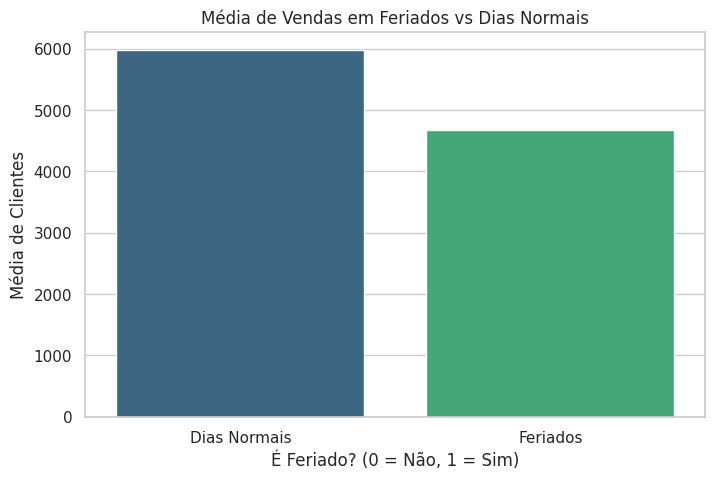

In [ ]:
#gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=media_vendas.index, y=media_vendas.values, palette="viridis")
plt.title('Média de Vendas em Feriados vs Dias Normais')
plt.xlabel('É Feriado? (0 = Não, 1 = Sim)')
plt.ylabel('Média de Clientes')
plt.xticks([0, 1], ['Dias Normais', 'Feriados'])
plt.show()

In [ ]:
media_vendas

,Sales
isHoliday,
0,5980.279717
1,4684.874237


In [ ]:
# Criando uma coluna para vendas por cliente
combined_data['SalesPerCustomer'] = combined_data['Sales'] / combined_data['Customers']

# Calculando vendas médias por cliente em feriados e dias normais
sales_per_customer_holiday = combined_data.groupby('isHoliday')['SalesPerCustomer'].mean()
print(sales_per_customer_holiday)

isHoliday
0    9.525294
1    9.288682
Name: SalesPerCustomer, dtype: float64


<ipython-input-193-78aa19031c1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


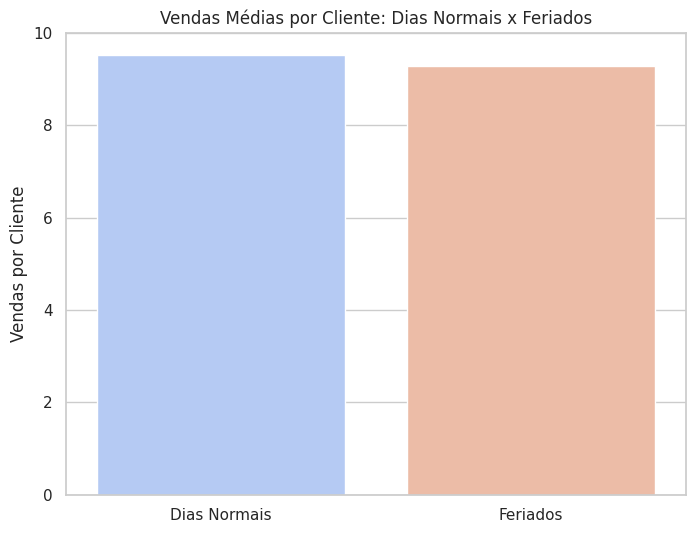

In [ ]:
# Gráfico de barras para vendas médias por cliente
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['Dias Normais', 'Feriados'],
    y=sales_per_customer_holiday.values,
    palette="coolwarm"
)
plt.ylabel('Vendas por Cliente')
plt.title('Vendas Médias por Cliente: Dias Normais x Feriados')
plt.show()

In [ ]:
# Calculando a média de vendas e número de clientes em feriados e dias normais por tipo de loja e sortimento
store_type_impact = combined_data.groupby(['StoreType', 'isHoliday'])[['Sales', 'Customers']].mean().reset_index()
assortment_impact = combined_data.groupby(['Assortment', 'isHoliday'])[['Sales', 'Customers']].mean().reset_index()

# Exibindo as tabelas para análise
print("Impacto por tipo de loja:")
print(store_type_impact)

print("\nImpacto por sortimento:")
print(assortment_impact)

Impacto por tipo de loja:
  StoreType  isHoliday         Sales    Customers
0         a          0   5946.697290   681.049191
1         a          1   4645.094646   543.632074
2         b          0  10005.956522  1981.038194
3         b          1  10330.163826  2022.008908
4         c          0   5940.065612   697.040288
5         c          1   4603.853012   550.264381
6         d          0   5854.617162   518.925811
7         d          1   4495.809260   407.238634

Impacto por sortimento:
  Assortment  isHoliday        Sales    Customers
0     Básico          0  5684.415675   640.041586
1     Básico          1  4398.225714   508.020450
2  Estendido          0  6275.577726   644.273839
3  Estendido          1  4926.131431   519.526280
4      Extra          0  8432.315805  2031.885751
5      Extra          1  9177.832964  2120.625277


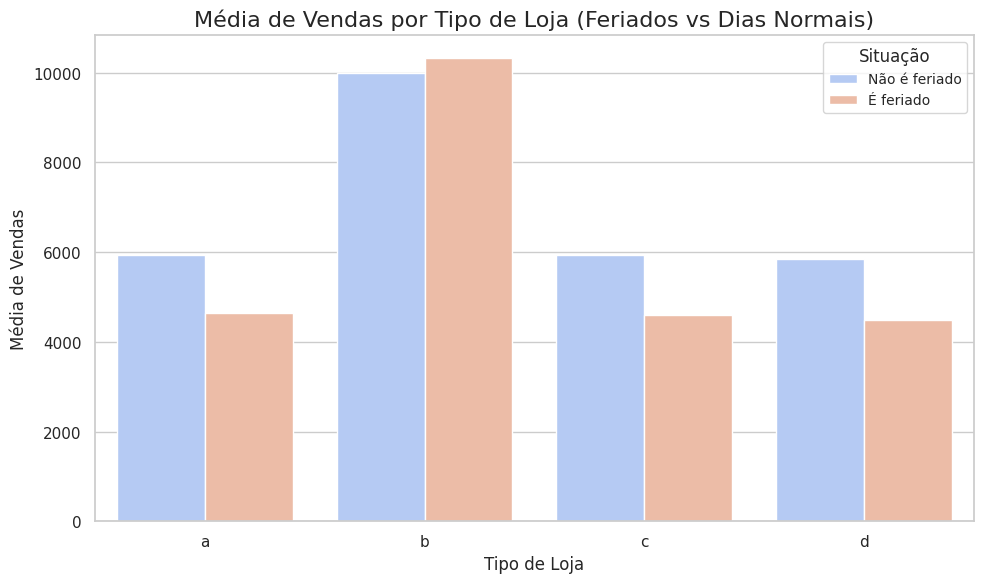

In [ ]:
# Calcular a média de vendas por tipo de loja e se é feriado
avg_sales_by_storetype_holiday = combined_data.groupby(['StoreType', 'isHoliday'])['Sales'].mean().reset_index()

# Renomear as colunas para melhor entendimento
avg_sales_by_storetype_holiday['isHoliday'] = avg_sales_by_storetype_holiday['isHoliday'].replace({0: 'Não é feriado', 1: 'É feriado'})

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_by_storetype_holiday, x='StoreType', y='Sales', hue='isHoliday', palette='coolwarm')
plt.title('Média de Vendas por Tipo de Loja (Feriados vs Dias Normais)', fontsize=16)
plt.xlabel('Tipo de Loja', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.legend(title='Situação', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
avg_sales_by_storetype_holiday

,StoreType,isHoliday,Sales
0,a,Não é feriado,5946.697290
1,a,É feriado,4645.094646
2,b,Não é feriado,10005.956522
3,b,É feriado,10330.163826
4,c,Não é feriado,5940.065612
5,c,É feriado,4603.853012
6,d,Não é feriado,5854.617162
7,d,É feriado,4495.809260


Percebemos que a média de clientes em dias normais é maior que em feriados, pode ser útil investir em campanhas e promoções

In [ ]:
# Filtrar dados de lojas abertas em feriados e dias normais
open_status = combined_data.groupby(['StoreType', 'StateHoliday', 'Open'])['Store'].count().unstack()

# Renomear colunas para facilitar a interpretação
open_status = open_status.rename(columns={0: 'Fechadas', 1: 'Abertas'})

# Separar dados por feriados e dias normais
holiday_open_status = open_status.loc[:, 'Abertas'].unstack().fillna(0)

print("Abertura de lojas em feriados e dias normais por tipo de loja:")
print(holiday_open_status)

Abertura de lojas em feriados e dias normais por tipo de loja:
StateHoliday        0  Natal    Nenhum  feriado  feriado de Páscoa
StoreType                                                         
a             61199.0    4.0  395602.0    236.0               36.0
b              2124.0   66.0   12988.0    285.0              100.0
c             15358.0    0.0   97555.0     65.0                0.0
d             33459.0    1.0  225197.0    108.0                9.0


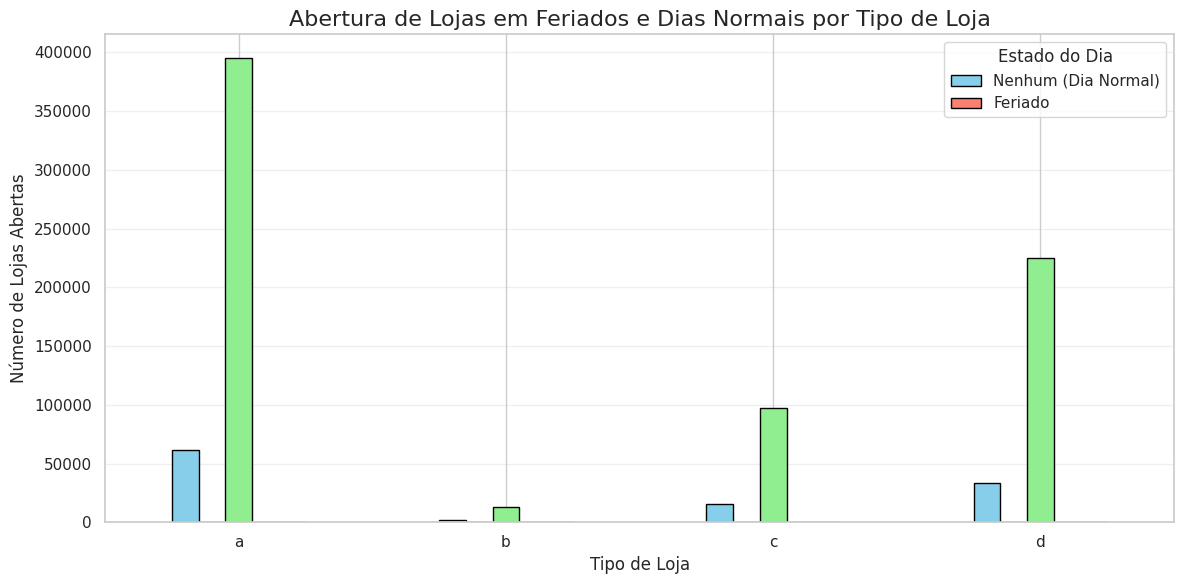

In [ ]:
# Criar um DataFrame com a contagem de lojas abertas em feriados e dias normais por tipo de loja
open_status = combined_data.groupby(['StoreType', 'StateHoliday', 'Open'])['Store'].count().unstack()
open_status = open_status.rename(columns={0: 'Fechadas', 1: 'Abertas'}).fillna(0)
holiday_open_status = open_status.loc[:, 'Abertas'].unstack()

# Plotar o gráfico de barras
holiday_open_status.plot(
    kind='bar',
    figsize=(12, 6),
    color=['skyblue', 'salmon', 'lightgreen', 'orange'],
    edgecolor='black'
)

# Adicionar título e rótulos
plt.title('Abertura de Lojas em Feriados e Dias Normais por Tipo de Loja', fontsize=16)
plt.xlabel('Tipo de Loja', fontsize=12)
plt.ylabel('Número de Lojas Abertas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Estado do Dia', labels=['Nenhum (Dia Normal)', 'Feriado'], loc='upper right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
open_status

Open                         Fechadas   Abertas
StoreType StateHoliday                         
a         0                   10487.0   61199.0
          Natal                2236.0       4.0
          Nenhum              67654.0  395602.0
          feriado             10597.0     236.0
          feriado de Páscoa    3576.0      36.0
b         0                       0.0    2124.0
          Natal                   0.0      66.0
          Nenhum                260.0   12988.0
          feriado                 5.0     285.0
          feriado de Páscoa       2.0     100.0
c         0                    2725.0   15358.0
          Natal                 564.0       0.0
          Nenhum              17120.0   97555.0
          feriado              2565.0      65.0
          feriado de Páscoa     888.0       0.0
d         0                    5720.0   33459.0
          Natal                1229.0       1.0
          Nenhum              38711.0  225197.0
          feriado              6399.0     108.0
          feriado de Páscoa    2079.0       9.0

###Relação entre clientes por feriado e tamanho da loja

<ipython-input-198-5d3e967e6af6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_tamanho = combined_data.groupby(['StoreSize', 'isHoliday'])['Customers'].mean().reset_index()


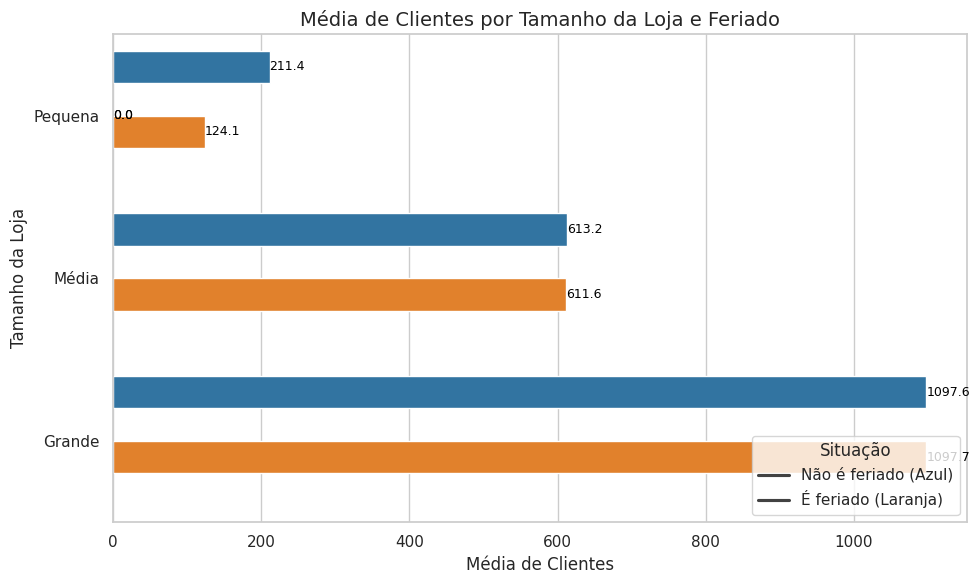

In [ ]:
# Categorizar lojas pelo número médio de clientes
combined_data['StoreSize'] = pd.qcut(combined_data['Customers'], q=3, labels=['Pequena', 'Média', 'Grande']) # baixo, médio e alto numero de clientes

# Calcular média de clientes por feriado e tamanho da loja
media_por_tamanho = combined_data.groupby(['StoreSize', 'isHoliday'])['Customers'].mean().reset_index()

# Definir uma paleta personalizada para maior contraste
palette = ['#1f77b4', '#ff7f0e']  # Azul e laranja

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=media_por_tamanho,
    y='StoreSize',
    x='Customers',
    hue='isHoliday',
    palette=palette,  # Usar paleta personalizada
    orient='h',
    dodge=True
)

# Ajustar a largura das barras para deixá-las mais finas
for bar in barplot.patches:
    bar.set_height(bar.get_height() * 0.5)

# Adicionar rótulos detalhados
for bar in barplot.patches:
    barplot.annotate(
        f'{bar.get_width():.1f}',  # Valor com uma casa decimal
        (bar.get_width(), bar.get_y() + bar.get_height() / 2),
        ha='left', va='center', fontsize=9, color='black'
    )

# Ajustar títulos e rótulos
plt.title('Média de Clientes por Tamanho da Loja e Feriado', fontsize=14)
plt.ylabel('Tamanho da Loja')
plt.xlabel('Média de Clientes')

# Personalizar a legenda com rótulos claros
plt.legend(
    title='Situação',
    labels=['Não é feriado (Azul)', 'É feriado (Laranja)'],  # Adicionar descrição das cores
    loc='lower right'
)

plt.tight_layout()
plt.show()

Percebemos que em lojas medias e grandes, os clientes em feriados ou não tem um número bem próximo, ja em lojas pequenas, os feriados não são bem aproveitados.

###Relação entre os tipos de feriados e vendas

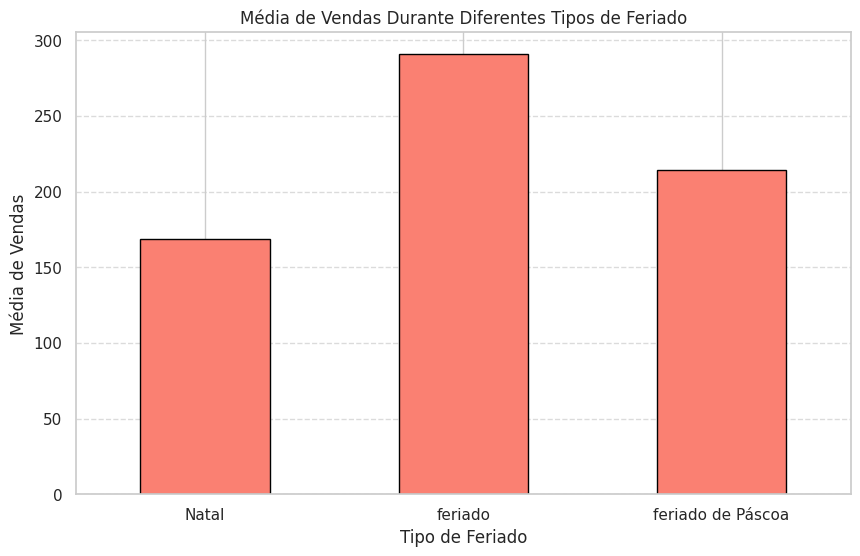

In [ ]:
# Agrupar os dados por StateHoliday e calcular a média de vendas
holiday_sales_comparison = combined_data.groupby('StateHoliday')['Sales'].mean()

# remover "Nenhum" da análise
holiday_sales_comparison = holiday_sales_comparison.drop('Nenhum')
holiday_sales_comparison = holiday_sales_comparison.drop(0)

# visualização
holiday_sales_comparison.plot(kind='bar', figsize=(10, 6), color='salmon', edgecolor='black')
plt.title('Média de Vendas Durante Diferentes Tipos de Feriado')
plt.xlabel('Tipo de Feriado')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
holiday_sales_comparison

,Sales
StateHoliday,
Natal,168.733171
feriado,290.735686
feriado de Páscoa,214.311510


- Feriados comuns costumam ter mais vendas, justamente pelo fato de ter mais lojas abertas;
- Assim, o impacto dos feriados nas vendas está intimamente ligado às políticas de abertura das lojas e ao comportamento dos consumidores durante esses períodos, o que é normal.

###Fechamento das escolas

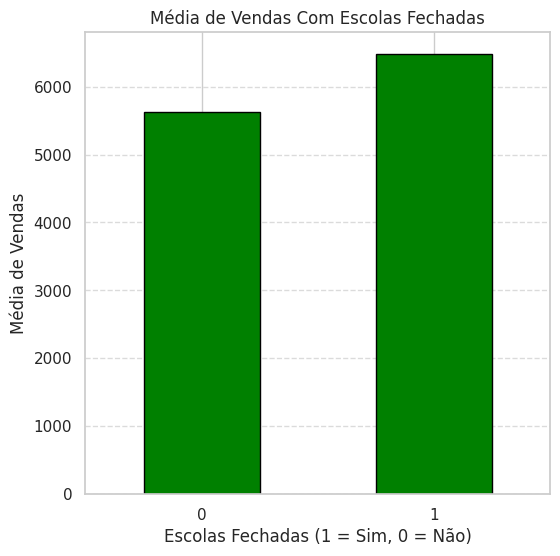

In [ ]:
# Médias de vendas nos dias em que SchoolHoliday = 1 (escolas fechadas) com os dias em que SchoolHoliday = 0 (escolas abertas)
school_holiday_sales = combined_data.groupby('SchoolHoliday')['Sales'].mean()

# gráfico para visualizaçao
school_holiday_sales.plot(kind='bar', figsize=(6, 6), color='green', edgecolor='black')
plt.title('Média de Vendas Com Escolas Fechadas')
plt.xlabel('Escolas Fechadas (1 = Sim, 0 = Não)')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
school_holiday_sales

,Sales
SchoolHoliday,
0,5620.979034
1,6476.522207


In [ ]:
# agora em relação ao fluxo de clientes
school_holiday_customers = combined_data.groupby('SchoolHoliday')['Customers'].mean()
school_holiday_customers

,Customers
SchoolHoliday,
0,617.645174
1,704.412941


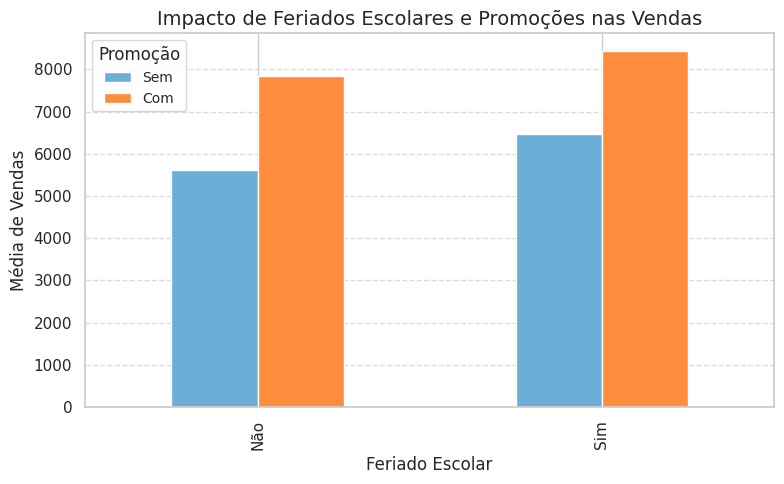

In [ ]:
# Analisar SchoolHoliday em conjunto com promoções (Promo)
school_holiday_promo = combined_data.groupby(['SchoolHoliday', 'Promo'])['Sales'].mean().unstack()

# Dados simulados da tabela para visualização
school_holiday_promo = {
    0: {0: 5620.98, 1: 7845.67},
    1: {0: 6476.52, 1: 8432.89}
}

# Criando DataFrame para melhor manipulação
df_school_holiday_promo = pd.DataFrame(school_holiday_promo).T
df_school_holiday_promo.index = ['Não', 'Sim']
df_school_holiday_promo.columns = ['Sem', 'Com']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
df_school_holiday_promo.plot(kind='bar', ax=ax, color=['#6baed6', '#fd8d3c'])

# Configurações do gráfico
ax.set_title('Impacto de Feriados Escolares e Promoções nas Vendas', fontsize=14)
ax.set_ylabel('Média de Vendas', fontsize=12)
ax.set_xlabel('Feriado Escolar', fontsize=12)
ax.legend(title='Promoção', fontsize=10, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
school_holiday_promo

{0: {0: 5620.98, 1: 7845.67}, 1: {0: 6476.52, 1: 8432.89}}

<ipython-input-206-815a0005e848>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  school_holiday_distance = combined_data.groupby(['SchoolHoliday', 'DistanceCategory'])['Sales'].mean().unstack()


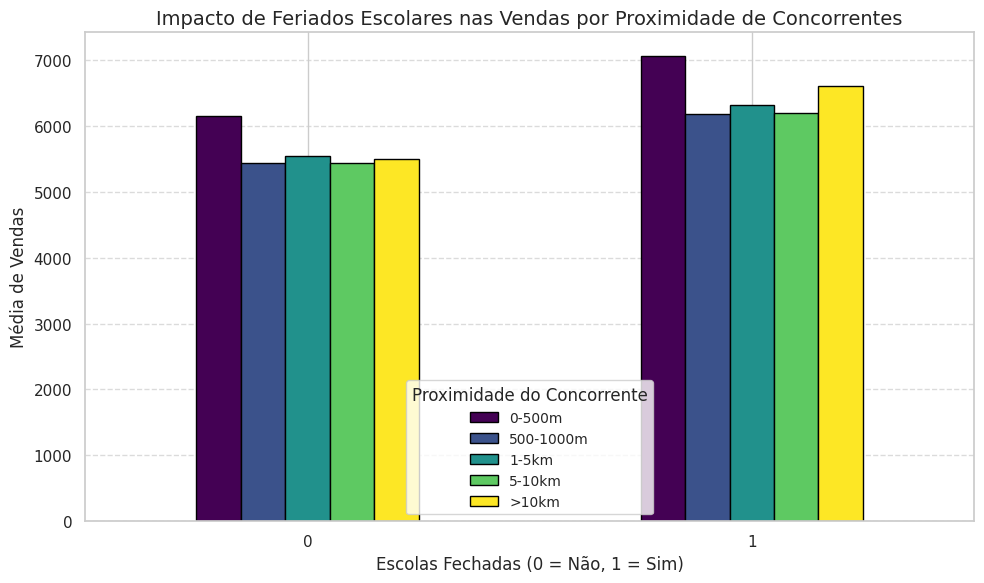

In [ ]:
# analisar SchoolHoliday em lojas próximas de concorrentes (CompetitionDistance)
school_holiday_distance = combined_data.groupby(['SchoolHoliday', 'DistanceCategory'])['Sales'].mean().unstack()
school_holiday_distance

# gráfico
school_holiday_distance.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

# ajustes
plt.title('Impacto de Feriados Escolares nas Vendas por Proximidade de Concorrentes', fontsize=14)
plt.xlabel('Escolas Fechadas (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Proximidade do Concorrente', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
school_holiday_distance

DistanceCategory,0-500m,500-1000m,1-5km,5-10km,>10km
SchoolHoliday,,,,,
0,6141.149264,5432.791560,5536.936294,5432.299121,5490.769363
1,7064.428751,6183.151301,6307.925145,6192.276314,6596.494644


**Análises**

- Com as escolas fechadas (SchoolHoliday = 1), o fluxo de clientes é maior, assim como a média de vendas, sendo ainda maior quando a proximidade do concorrente é de até 500m;
- Além disso, quando temos promoções no dia, a média de vendas cresce ainda mais;
- Já que a diferença não é tão grande, a CerreiraFosta Ltda. pode atrair um público diversificado, não limitado a famílias ou responsáveis por crianças, além de que produtos como móveis e eletrodomésticos podem não ser diretamente influenciados pelo calendário escolar.

**Insights**

- Planejamento de estoque e funcionários: Preparar as lojas próximas de concorrentes com maior estoque e equipe reforçada nesses dias pode garantir uma experiência de compra positiva, minimizando rupturas ou tempos de espera;
- Mesmo que o aumento seja moderado, as lojas podem explorar esse momento para promoções voltadas a famílias, como descontos em itens de decoração infantil, organização ou produtos que atendam a esse público.
- O aumento do fluxo de clientes e da média de vendas durante os feriados escolares indica que esses dias representam uma oportunidade estratégica para as lojas. Isso sugere que as pessoas tendem a consumir mais produtos, possivelmente devido a um aumento de circulação familiar ou tempo disponível para compras.
- O fato de a média de vendas ser ainda maior quando o concorrente está a até 500 metros reforça a ideia de que lojas próximas podem capturar a demanda adicional gerada pelos feriados escolares. Isso destaca a importância de estratégias competitivas em regiões com alta densidade de concorrentes.
- O crescimento das vendas em dias de promoções durante feriados escolares evidencia que promoções são uma alavanca eficaz para atrair ainda mais clientes e aproveitar o aumento natural da demanda.

**Recomendações Estratégicas**

- Planejar campanhas direcionadas para esses períodos, com promoções especiais e maior foco em marketing local, visando atrair o fluxo extra de clientes.
- Foco em Regiões Próximas a Concorrentes: Usar promoções agressivas para consolidar a base de clientes e evitar a perda para concorrentes próximos nesses dias.
- Promoções Bem-estruturadas: Oferecer descontos ou pacotes promocionais nos feriados escolares para maximizar o potencial de vendas e fortalecer a fidelização dos clientes.

##Análise de promoções

###Análise geral de promoções

Promo
0    629129
1    388080
Name: count, dtype: int64
Promo
0    61.848548
1    38.151452
Name: proportion, dtype: float64


<ipython-input-208-9016dba523fc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


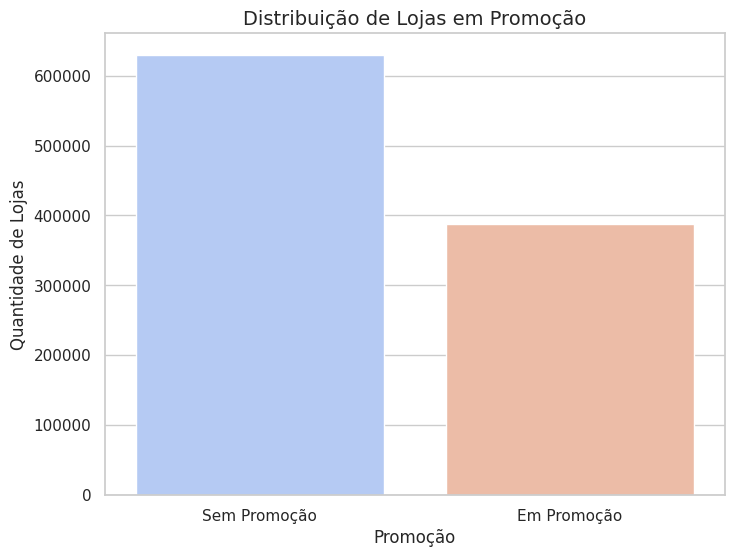

In [ ]:
#Contagem de lojas em promoção (Promo = 1) e não em promoção (Promo = 0)
promo_counts = combined_data['Promo'].value_counts()
promo_percentages = combined_data['Promo'].value_counts(normalize=True) * 100

print(promo_counts)
print(promo_percentages)

# Visualização da distribuição de promoções
plt.figure(figsize=(8, 6))
sns.barplot(
    x=promo_counts.index,
    y=promo_counts.values,
    palette='coolwarm'
)
plt.title('Distribuição de Lojas em Promoção', fontsize=14)
plt.xlabel('Promoção')
plt.ylabel('Quantidade de Lojas')
plt.xticks([0, 1], ['Sem Promoção', 'Em Promoção'])
plt.show()


Verificamos que há uma percentagem muito maior de lojas sem promoção em compartivo as com promoção
- lembrando que Promo é a promocao realizada naquele dia. Assim, esse gráfico mostra a quantidade de lojas (várias repetidas) que já fizeram promoção. talvez seja melhor olhar a distribuição da promo pelos meses, vendo em quais se tem mais ou menos promo.

In [ ]:
# Contar o número total de lojas únicas
total_lojas = combined_data['Store'].nunique()
print(f"Total de lojas no dataset: {total_lojas}")

Total de lojas no dataset: 1115


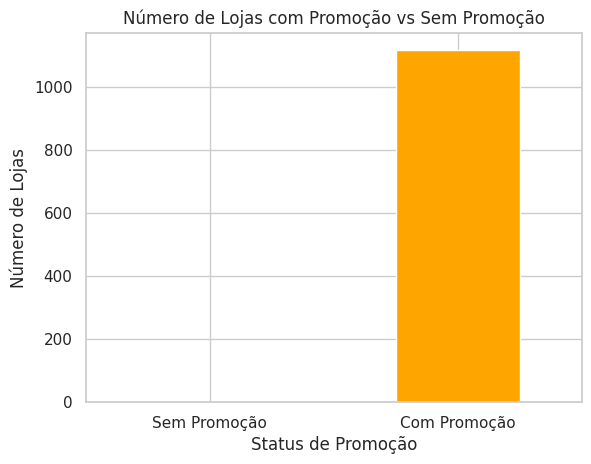

In [ ]:
# Verificar a presença de promoções por loja
promo_per_store = combined_data.groupby('Store')['Promo'].any().value_counts()

# Renomear índices para maior clareza
promo_per_store = promo_per_store.reindex([False, True])
promo_per_store.index = ['Sem Promoção', 'Com Promoção']
promo_per_store

promo_per_store.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Número de Lojas com Promoção vs Sem Promoção')
plt.ylabel('Número de Lojas')
plt.xlabel('Status de Promoção')
plt.xticks(rotation=0)
plt.show()

Ou seja, todas as lojas fizeram promoção pelo menos 1 vez

###Relação entre o número de vendas gerais e a promoção

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


<ipython-input-211-7dc7a6cc8936>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Promo', y='Sales', palette='coolwarm', ci=None)
<ipython-input-211-7dc7a6cc8936>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_data, x='Promo', y='Sales', palette='coolwarm', ci=None)


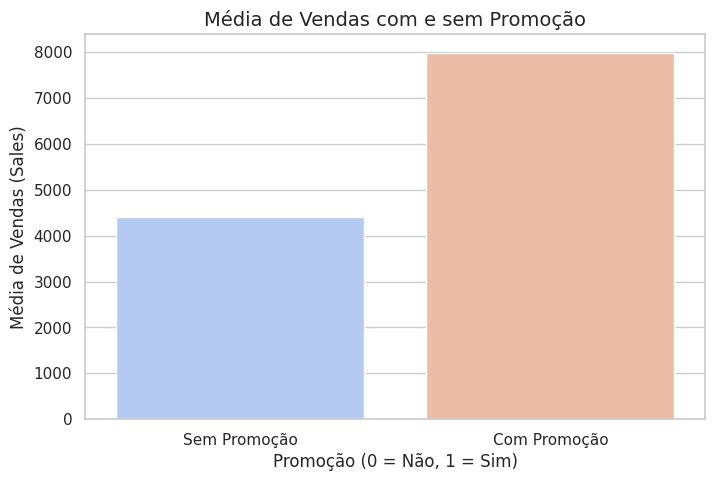

In [ ]:
# Resumo estatístico das vendas com e sem promoções
sales_promo_stats = combined_data.groupby('Promo')['Sales'].describe()

sales_mean = combined_data.groupby('Promo')['Sales'].mean()
print (sales_mean)
# Visualização com Gráfico de Barras (média)
plt.figure(figsize=(8, 5))
sns.barplot(data=combined_data, x='Promo', y='Sales', palette='coolwarm', ci=None)
plt.title('Média de Vendas com e sem Promoção', fontsize=14)
plt.xlabel('Promoção (0 = Não, 1 = Sim)')
plt.ylabel('Média de Vendas (Sales)')
plt.xticks([0, 1], ['Sem Promoção', 'Com Promoção'])
plt.show()

<ipython-input-212-5b035439eb27>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_data, x='Promo', y='Customers', palette='coolwarm', ci=None)
<ipython-input-212-5b035439eb27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_data, x='Promo', y='Customers', palette='coolwarm', ci=None)


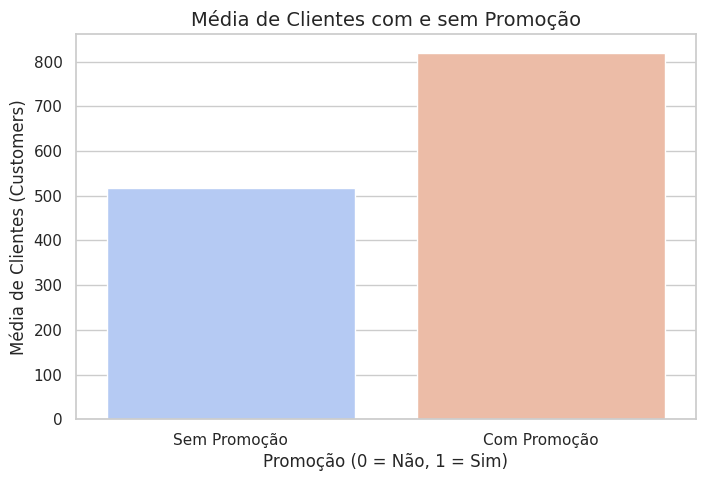

In [ ]:
# clientes com e sem promoções
sales_mean = combined_data.groupby('Promo')['Customers'].mean()

# Visualização com Gráfico de Barras (média)
plt.figure(figsize=(8, 5))
sns.barplot(data=combined_data, x='Promo', y='Customers', palette='coolwarm', ci=None)
plt.title('Média de Clientes com e sem Promoção', fontsize=14)
plt.xlabel('Promoção (0 = Não, 1 = Sim)')
plt.ylabel('Média de Clientes (Customers)')
plt.xticks([0, 1], ['Sem Promoção', 'Com Promoção'])
plt.show()

In [ ]:
sales_mean

,Customers
Promo,
0,517.823542
1,820.098815


Verifica-se que, como esperado, com promoção se vende mais e temos mais clientes. Agora veremos detalhadamente como essas promoções afetam nas lojas

###Analisando o impacto da promoção em relação ao Tamanho da loja

<ipython-input-214-4f153b6346d7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_promo_store = combined_data.groupby(['StoreSize', 'Promo'])['Sales'].mean().reset_index()


Média de Vendas por Promoção e Tamanho da Loja:
  StoreSize  Promo         Sales
0   Pequena      0   1674.273098
1   Pequena      1   3718.146298
2     Média      0   5519.381217
3     Média      1   6659.243108
4    Grande      0   8425.042980
5    Grande      1  10091.396191


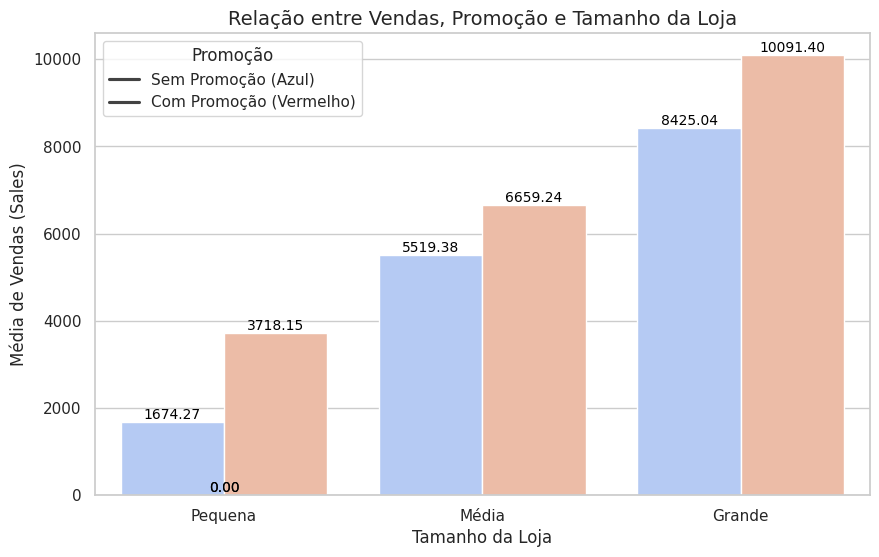

In [ ]:
# Agrupar dados por Promo e StoreSize, calculando a média de vendas
sales_promo_store = combined_data.groupby(['StoreSize', 'Promo'])['Sales'].mean().reset_index()

# Exibir tabela com os dados agrupados
print("Média de Vendas por Promoção e Tamanho da Loja:")
print(sales_promo_store)

# Visualização com gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=sales_promo_store,
    x='StoreSize',
    y='Sales',
    hue='Promo',
    palette='coolwarm'
)

# Adicionar os valores em cima das barras
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.2f'),  # Formatação do número com 2 casas decimais
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'  # Ajustes visuais
    )

# Adicionar título e rótulos
plt.title('Relação entre Vendas, Promoção e Tamanho da Loja', fontsize=14)
plt.xlabel('Tamanho da Loja')
plt.ylabel('Média de Vendas (Sales)')

# Ajustar a legenda para incluir a descrição das cores
plt.legend(
    title='Promoção',
    labels=[
        'Sem Promoção (Azul)',  # Cor azul para Promo=0
        'Com Promoção (Vermelho)'  # Cor vermelho para Promo=1
    ]
)
plt.show()

Conseguimos perceber que a influência da promoção nas lojas pequenas, é maior que nas médias e grandes. Logo, é importante que as lojas pequenas tenham promoções constantes para consolidar os clientes e assim crescer o patamar da loja.

###Relação entre promoção, vendas e a distância para o concorrente

<ipython-input-215-1b1533bd2e73>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_distance_promo = combined_data.groupby(['DistanceCategory', 'Promo'])['Sales'].mean().reset_index()


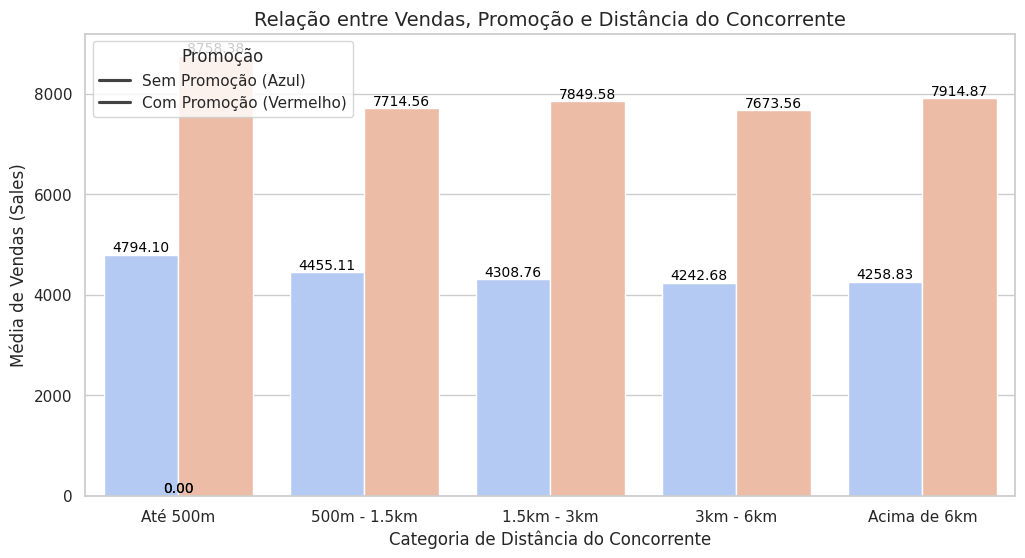

In [ ]:
# Criar categorias para CompetitionDistance (faixas de distância)
bins = [0, 500, 1500, 3000, 6000, combined_data['CompetitionDistance'].max()]
labels = ['Até 500m', '500m - 1.5km', '1.5km - 3km', '3km - 6km', 'Acima de 6km']
combined_data['DistanceCategory'] = pd.cut(combined_data['CompetitionDistance'], bins=bins, labels=labels)

# Agrupar por Promo e DistanceCategory, calculando a média de Sales
sales_distance_promo = combined_data.groupby(['DistanceCategory', 'Promo'])['Sales'].mean().reset_index()



# Visualizar os dados com um gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=sales_distance_promo,
    x='DistanceCategory',
    y='Sales',
    hue='Promo',
    palette='coolwarm'
)

# Adicionar os valores em cima das barras
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.2f'),  # Formatação do número com 2 casas decimais
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'  # Ajustes visuais
    )

# Adicionar título e rótulos
plt.title('Relação entre Vendas, Promoção e Distância do Concorrente', fontsize=14)
plt.xlabel('Categoria de Distância do Concorrente')
plt.ylabel('Média de Vendas (Sales)')

# Ajustar a legenda para incluir descrição das cores
plt.legend(
    title='Promoção',
    labels=[
        'Sem Promoção (Azul)',  # Cor azul para Promo=0
        'Com Promoção (Vermelho)'  # Cor vermelho para Promo=1
    ]
)

# Exibir o gráfico
plt.show()

Percebe-se na análise, que mantém-se um padrão, porém, a influência com concorrentes de até 500m acaba sendo maior. Por isso, sugere manter as promoções nessas lojas e aumentar o fluxo de promoções.



###Relação entre os meses de promoção e o número de vendas e de clientes

Valores distintos de PromoInterval:
[None 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


<ipython-input-216-d1a33d2034ad>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


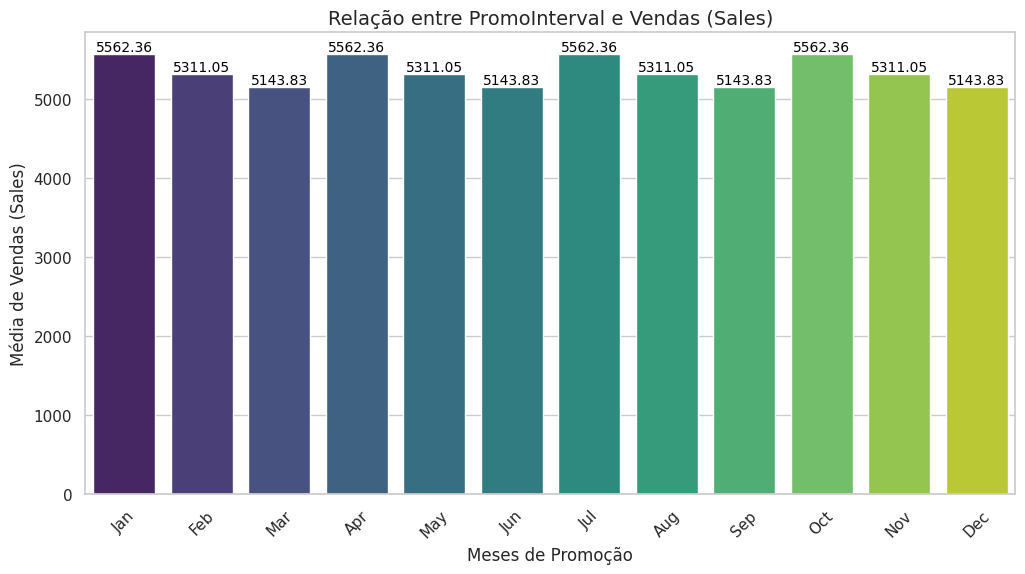

In [ ]:
# Explorar a coluna PromoInterval
print("Valores distintos de PromoInterval:")
print(combined_data['PromoInterval'].unique())

# Expandir os meses de PromoInterval em colunas binárias para facilitar a análise
promo_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in promo_months:
    combined_data[month] = combined_data['PromoInterval'].apply(
        lambda x: 1 if isinstance(x, str) and month in x else 0
    )

# Calcular a média de vendas para cada mês de promoção
monthly_sales = []
for month in promo_months:
    mean_sales = combined_data.loc[combined_data[month] == 1, 'Sales'].mean()
    monthly_sales.append((month, mean_sales))

# Converter para DataFrame para visualização
monthly_sales_df = pd.DataFrame(monthly_sales, columns=['Month', 'MeanSales'])

# Visualizar os dados com gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_sales_df,
    x='Month',
    y='MeanSales',
    palette='viridis'
)

# Adicionar valores em cima das barras
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.2f'),  # Formatação do número
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Título e rótulos
plt.title('Relação entre PromoInterval e Vendas (Sales)', fontsize=14)
plt.xlabel('Meses de Promoção')
plt.ylabel('Média de Vendas (Sales)')
plt.xticks(rotation=45)
plt.show()

Percebe-se uma maior eficiência nas promoções realizadas em [Jan,Apr,Jul,Oct], que pode estar relacionada a férias ou a algum outro fator.

<ipython-input-217-cf8ee17b7c9d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


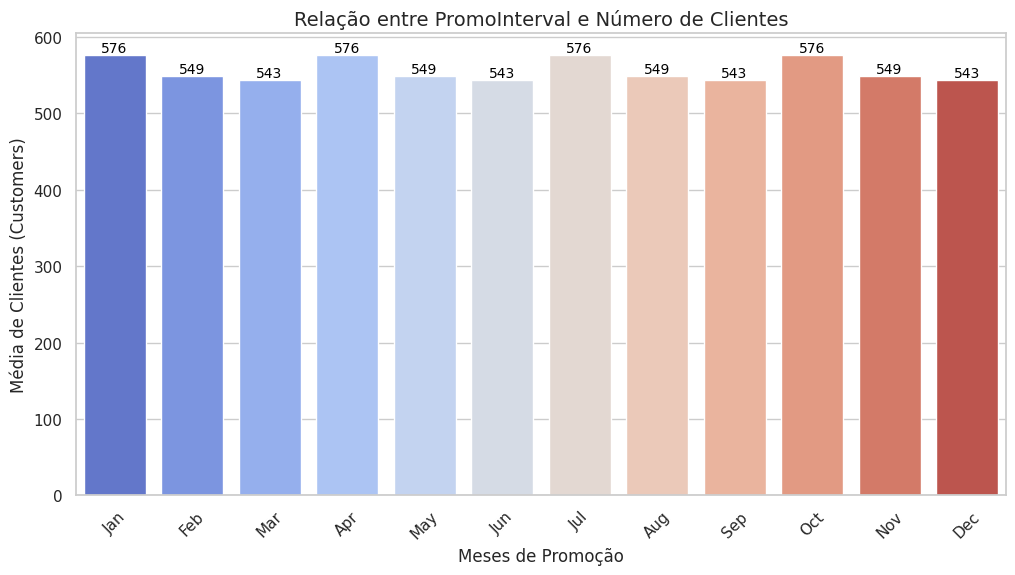

In [ ]:
# Expandir os meses de PromoInterval em colunas binárias para facilitar a análise
promo_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month in promo_months:
    combined_data[month] = combined_data['PromoInterval'].apply(
        lambda x: 1 if isinstance(x, str) and month in x else 0
    )

# Calcular a média de clientes para cada mês de promoção
monthly_customers = []
for month in promo_months:
    mean_customers = combined_data.loc[combined_data[month] == 1, 'Customers'].mean()
    monthly_customers.append((month, mean_customers))

# Converter para DataFrame para visualização
monthly_customers_df = pd.DataFrame(monthly_customers, columns=['Month', 'MeanCustomers'])

# Visualizar os dados com gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_customers_df,
    x='Month',
    y='MeanCustomers',
    palette='coolwarm'
)

# Adicionar valores em cima das barras
for bar in plt.gca().patches:
    plt.gca().annotate(
        format(bar.get_height(), '.0f'),  # Formatação do número sem casas decimais
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Título e rótulos
plt.title('Relação entre PromoInterval e Número de Clientes', fontsize=14)
plt.xlabel('Meses de Promoção')
plt.ylabel('Média de Clientes (Customers)')
plt.xticks(rotation=45)
plt.show()

Seguindo o mesmo padrão do gráfico de vendas, o intervalo [Jan,Apr,Jul,Oct] apresenta um recrutamento de clientes maior que os outros meses

###Crescimento das vendas na promo2

Média de Vendas por Promo2:
   Promo2        Sales
0       0  6124.710161
1       1  5423.718218


<ipython-input-218-f8aeab85c9c3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


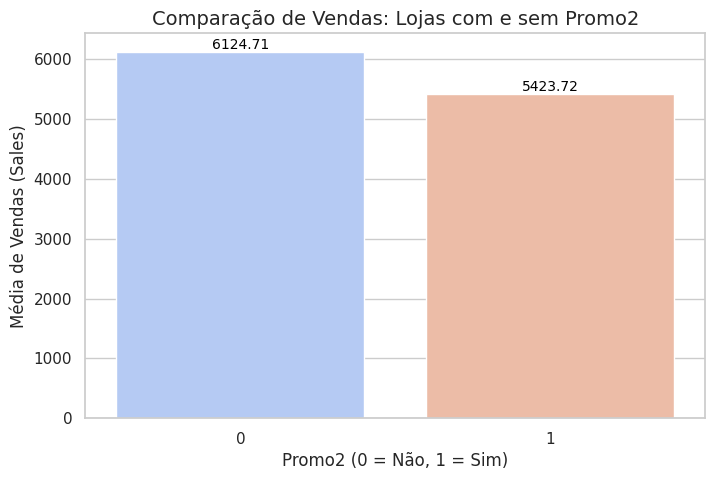

In [ ]:
# Agrupar dados por Promo2 e calcular a média de vendas
promo2_sales = combined_data.groupby('Promo2')['Sales'].mean().reset_index()

# Exibir tabela com os dados agrupados
print("Média de Vendas por Promo2:")
print(promo2_sales)

# Visualizar os dados com gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(
    data=promo2_sales,
    x='Promo2',
    y='Sales',
    palette='coolwarm'
)

# Adicionar valores em cima das barras
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.2f'),  # Formatação com duas casas decimais
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Título e rótulos
plt.title('Comparação de Vendas: Lojas com e sem Promo2', fontsize=14)
plt.xlabel('Promo2 (0 = Não, 1 = Sim)')
plt.ylabel('Média de Vendas (Sales)')

# Exibir o gráfico
plt.show()

Contrapondo o esperado pelas lojas, a promo 2 não demonstra uma estratégia eficiente, visto que demonstra um número de vendas menor que as lojas que não participaram.

<ipython-input-219-cbb3986f2955>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


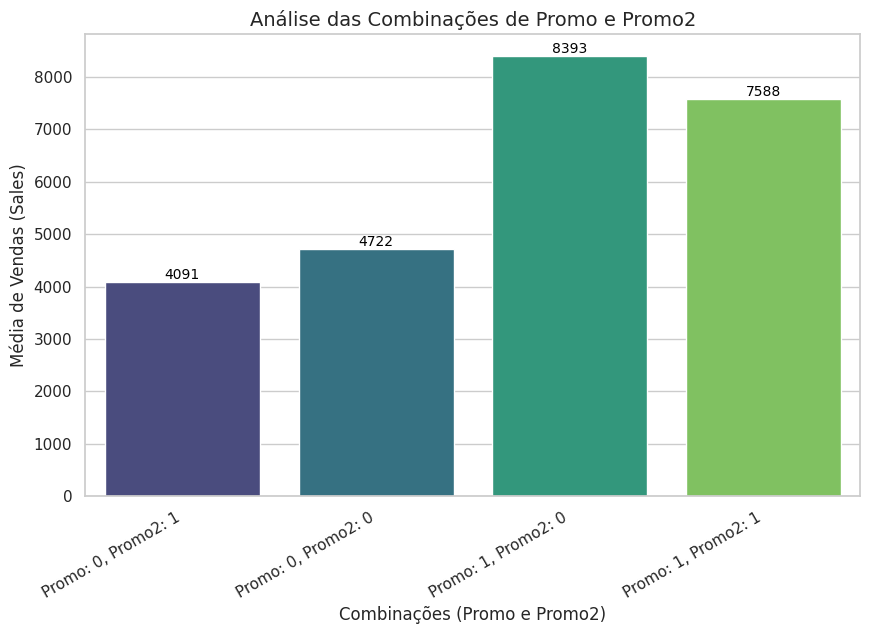

In [ ]:
# Tratar valores nulos em Promo e Promo2 (substituir por 0)
combined_data['Promo'] = combined_data['Promo'].fillna(0).astype(int)
combined_data['Promo2'] = combined_data['Promo2'].fillna(0).astype(int)

# Criar uma nova coluna combinando Promo e Promo2
combined_data['Promo_Promo2'] = combined_data.apply(
    lambda row: f"Promo: {row['Promo']}, Promo2: {row['Promo2']}", axis=1
)

# Contar a quantidade de lojas para cada combinação
promo_combinations_count = combined_data['Promo_Promo2'].value_counts().reset_index()
promo_combinations_count.columns = ['Combination', 'Count']

# Calcular a média de vendas para cada combinação
promo_combinations_sales = combined_data.groupby('Promo_Promo2')['Sales'].mean().reset_index()
promo_combinations_sales.columns = ['Combination', 'MeanSales']

# Mesclar as informações de contagem e média de vendas
promo_combinations = pd.merge(promo_combinations_count, promo_combinations_sales, on='Combination')

# Visualizar os dados com gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=promo_combinations,
    x='Combination',
    y='MeanSales',
    palette='viridis'
)

# Adicionar valores em cima das barras
for bar in bar_plot.patches:
    bar_plot.annotate(
        f"{int(bar.get_height())}",  # Exibir a média de vendas
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Posição do texto
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Título e rótulos
plt.title('Análise das Combinações de Promo e Promo2', fontsize=14)
plt.xlabel('Combinações (Promo e Promo2)')
plt.ylabel('Média de Vendas (Sales)')
plt.xticks(rotation=30, ha='right')
plt.show()


Verifica-se o benefício trazido pelas lojas que realizaram a promoção sem ser uma promoção contínua, tendo um maior aproveitamento as promoções em dias específicos.